In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the data
path = "C:/Users/Mehmet/Desktop/data/USA_cars_datasets.csv"
df = pd.read_csv(path)

In [3]:
# rough visually check the data(Some information of data are wrong, like year, make etc., there is open data on the net to
# get make,model,year information by using vin number, therefore the data will be corrected scrapped data )
df

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


In [4]:
# The first column is same as index values, therefore dropping this columns won't cause any data loss. 
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
# model,year and make information can not get through the web site if thay older than 1990, so they are corrected manually later 
df0 = df[df['year']<=1990]

In [6]:
# required libriaies for scrapping
from bs4 import BeautifulSoup
from requests_html import HTMLSession
from urllib.parse import urljoin
from urllib.request import urlopen
import urllib.request

In [7]:
#Scrapping make,model,year information by using vin numbers
columns = ['Make','Model','Year']
df_new = df[['vin','year']].copy()
df_joint = pd.DataFrame(columns=columns)
df_new['vin'] = df_new['vin'].apply(lambda x: x.lstrip() )

for k,(year,vin) in enumerate(zip(df_new['year'],df_new['vin'])):
    if year > 1990:
        user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
        url =  'https://perfect2car.com/vin-db-'+vin+'-info'
        headers={'User-Agent':user_agent,} 
        request=urllib.request.Request(url,None,headers) #The assembled request
        response = urllib.request.urlopen(request)
        data = response.read() # The data u need
        soup = BeautifulSoup(data, 'lxml')
        text = soup.get_text()
        row = soup.find('tr')
        list = []
        rows = soup.find_all('tr')
        for row in rows:          # Print all occurrences
            list.append(row.get_text())
            for j,i in zip(columns,list[0:3]):
                w = i.index('\n')
                a = i[w+1:]
                df_joint.loc[k,j] = a
    else:# This is the condition for old model cars 
        for j in columns:
            df_joint.loc[k,j] = np.nan 

    

In [8]:
# Cars which theircan not be scapped their info
df

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


In [9]:
# Manual correction for old cars which were in df0 
df_joint.loc[32,'Make']='Checrolet'
df_joint.loc[405,'Make']='Ford'
df_joint.loc[32,'Model']='Camaro'
df_joint.loc[405,'Model']='F150'
df_joint.loc[32,'Year']=1973
df_joint.loc[405,'Year']=1984

In [10]:
# Srapped information
df_joint

,Make,Model,Year
0,Toyota,FJ Cruiser,2008
1,Ford,Edge,2011
2,Dodge,Journey,2015
3,Ford,F-150,2014
4,Chevrolet,Silverado 1500,2016
...,...,...,...
2494,Nissan,Versa,2015
2495,Nissan,Versa,2015
2496,Nissan,Versa,2015
2497,Nissan,Versa,2015


In [11]:
df_joint.isnull().sum()

Make     0
Model    0
Year     0
dtype: int64

In [12]:
# Generating Age column and adding scraaped data frame
df_joint['Year']=df_joint['Year'].apply(lambda x: int(x))
df_joint['Age'] = 2020 - df_joint['Year']

In [13]:
# Adding price data to scrapped data frame
df_joint['Price'] = df['price'].values

In [14]:
# Adding title data to scrapped data frame
df_joint['Title Status'] = df['title_status'].values

In [15]:
# Adding mileage data to scrapped data frame
df_joint['Mileage'] = df['mileage'].values

In [16]:
# Adding color data to scrapped data frame
df_joint['Color'] = df['color'].values

In [17]:
# Adding vin number data to scrapped data frame
df_joint['Vin Number'] = df['vin'].values

In [18]:
# Adding lot number data to scrapped data frame
df_joint['Lot Number'] = df['lot'].values

In [19]:
# Adding state data to scrapped data frame
df_joint['State'] = df['state'].values

In [20]:
# Adding country data to scrapped data frame
df_joint['Country'] = df['country'].values

In [21]:
# Adding condition data to scrapped data frame
df_joint['Condition'] = df['condition'].values

In [22]:
# generating liquidation time column by using condition information 
df_joint['Condition'].unique()

array(['10 days left', '6 days left', '2 days left', '22 hours left',
       '20 hours left', '19 hours left', '3 days left', '21 hours left',
       '17 hours left', '2 hours left', '3 hours left', '34 minutes',
       '16 hours left', '18 hours left', '1 days left', '32 minutes',
       '14 hours left', '5 hours left', '4 days left', '9 days left',
       '23 hours left', '8 days left', '7 days left', '5 days left',
       '9 minutes', '1 minutes', '7 hours left', '16 minutes',
       '6 hours left', '1 hours left', 'Listing Expired', '13 days left',
       '24 hours left', '15 hours left', '53 minutes', '27 minutes',
       '12 days left', '15 days left', '30 minutes', '29 minutes',
       '28 minutes', '48 minutes', '11 days left', '4 hours left',
       '47 minutes', '12 hours left', '36 minutes'], dtype=object)

In [23]:
# stripping numeric time
df_joint['cond_numeric'] = df_joint['Condition'].apply(lambda x: x.rstrip(' days left  hours left minutes'))

In [24]:
# converting numeric time data day based
df_joint['cond_metrics'] = df_joint['Condition'].apply(lambda x: 1 if x.__contains__('days')==True else 0.04167  if x.__contains__('hours')==True else 0.0006944)

In [25]:
# There is one data is names listing expired that imputed 'Listing Exp' with 1.5 fold of max waiting(15*1.5)
df_joint['cond_numeric']= df_joint['cond_numeric'].apply(lambda x: 22.5 if x=='Listing Exp' else x)
df_joint['cond_metrics']= df_joint['cond_metrics'].apply(lambda x: 1 if x=='Listing Expired' else x)

In [26]:
# Liquidation time data
df_joint['Liquidation Time'] = np.zeros(len(df_joint))
for (i,(j,k)) in zip(df_joint['cond_numeric'],enumerate(df_joint['cond_metrics'])):
    df_joint.loc[j,'Liquidation Time'] = float(i)*float(k)      

In [27]:
#dropping condition,cond_numeric,cond_metrics
df_joint.drop(['Condition','cond_numeric','cond_metrics'],axis=1,inplace=True)

In [28]:
# Removing space on model data
df_joint['Model'] = df_joint['Model'].str.strip()

In [29]:
# all model data should be fixed 
df_joint['Model'].unique()

array(['FJ Cruiser', 'Edge', 'Journey', 'F-150', 'Silverado 1500',
       'Grand Caravan', 'Yukon XL', 'Malibu', 'Challenger', 'Yukon',
       'Town & Country', 'Forte', 'Encore', 'F-350 SD', 'Equinox',
       'Sorento', 'Verano', 'C-Max Hybrid', 'M', 'Camaro', 'Thunderbird',
       'Sprinter', 'F-250 SD', 'Compass', 'Enclave', '300', 'Cherokee',
       'LaCrosse', 'Pacifica', 'Escape', 'X3', '200',
       '4-Series Gran Coupe', 'X5', 'Colorado', 'Explorer', 'Focus',
       'XT5', 'Durango', 'Charger', 'Escalade', 'Silverado 3500HD',
       'Traverse', 'Dart', 'Silverado 2500HD', 'Avenger', 'Econoline',
       'Expedition', 'ATS', '7-Series', 'Flex', 'Transit', 'Express',
       'Fusion', 'Dakota', 'SRX', 'Concorde', 'F-550', 'Transit Connect',
       'Ram 1500', 'Ram 2500', 'Mustang', 'Trax', 'Tahoe',
       'Fusion Hybrid', '1500', '3500', '3-Series', 'Suburban',
       'F-450 SD', 'Fiesta', 'Impala', 'Elantra', 'Std.', 'CX-7', 'Soul',
       'S10 Pickup', 'Accord', 'QX60', 'Cobalt',

In [30]:
# correcting model data
df_joint['Model'] = df_joint['Model'].apply(lambda x: 'Versa' if x=='Versa Note' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: 'Bighorn' if x=='Heartland Recreational Vehicles LLC' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: 'Bighorn' if x=='Bighorn,\xa0Bighorn\xa0Traveler,\xa0Big\xa0Country,\xa0&\xa0Landmark' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: 'Sierra' if x=='C/K 1500' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: 'Titan' if x=='Titan XD' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: 'Fusion' if x=='Fusion Energi' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: 'Fusion' if x=='Fusion Hybrid' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: 'Discovery' if x=='Discovery Sport' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: '1500' if x=='Ram 1500' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: 'Malibu' if x=='Malibu Limited' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: 'F-450' if x=='F-450 SD' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: 'Optima' if x=='Std.' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: 'Silverado' if x=='Silverado 1500' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: 'Silverado' if x=='Silverado 2500' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: 'Silverado' if x=='Silverado 2500HD' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: 'Silverado' if x==' Silverado 3500' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: 'Silverado' if x==' Silverado 3500HD' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: 'Yukon' if x=='Yukon Denali' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: 'Yukon' if x=='Yukon XL' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: 'Transit' if x=='Transit Connect' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: 'Sierra' if x=='Sierra 2500HD' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: 'Sierra' if x=='Sierra 1500' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: 'Shelby' if x=='Shelby GT350' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: 'Shelby' if x=='Shelby GT500' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: '2500' if x=='Ram 2500' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: 'Rogue' if x=='Rogue Sport' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: 'Prowler' if x=='Prowler, Prowler Shadow, Prowler Sport' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: 'Cherokee' if x=='Grand Cherokee' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: 'Focus' if x=='Focus Wagon' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: 'Escape' if x=='Escape Hybrid' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: 'Cruze' if x=='Cruze Limited' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: '7-Series' if x=='7 SERIES' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: 'F-150' if x=='F150' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: 'Yukon' if x=='Yukon XL' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: 'F-350' if x=='F-350 SD' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: 'F-250' if x=='F-250 SD' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: 'Sierra 2500' if x=='Sierra 2500HD' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: 'Silverado 2500' if x=='Silverado 2500HD' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: 'Yukon' if x=='Yukon XL' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: '4-Series' if x=='4-Series Gran Coupe' else x)
df_joint['Model'] = df_joint['Model'].apply(lambda x: 'Silverado 3500' if x=='Silverado 3500HD' else x)



In [31]:
# model information in dataframe for car type
path1 = "C:/Users/Mehmet/Desktop/data/models.csv"
models = pd.read_csv(path1)
models['Sedan'] = models['Sedan'].str.strip()
models['Light Truck_com_Van'] = models['Light Truck_com_Van'].str.strip()
models['SUV'] = models['SUV'].str.strip()
models['RV'] = models['RV'].str.strip()
models['motor_bike'] = models['motor_bike'].str.strip()
df_joint['Type'] = np.zeros(len(df_joint))
for i,j in enumerate(df_joint['Model']):
    if models['Sedan'].isin([j]).any()==True:
        df_joint.loc[i,'Type']='Sedan'
    elif models['Light Truck_com_Van'].isin([j]).any()==True:
        df_joint.loc[i,'Type']='light_truck_com_van'
    elif models['Heawy_Truck'].isin([j]).any()==True:
        df_joint.loc[i,'Type']='heawy_truck'
    elif models['SUV'].isin([j]).any()==True:
        df_joint.loc[i,'Type']='suv'    
    elif models['RV'].isin([j]).any()==True:
        df_joint.loc[i,'Type']='rv' 
    else:
        df_joint.loc[i,'Type']='motor_bike'
        





In [32]:
#correcting country data
df_joint['Country'] = df_joint['Country'].str.strip()
df_joint['Country'] = df_joint['Country'].apply(lambda x: 'USA' if x=='usa' else x)
df_joint['Country'] = df_joint['Country'].apply(lambda x: 'Canada' if x=='canada' else x)

In [33]:
#correcting make column
df_joint['Make'] = df_joint['Make'].str.strip()
df_joint['Make'] = df_joint['Make'].apply(lambda x: 'Chevrolet' if x=='Checrolet' else x)
df_joint['Make'] = df_joint['Make'].apply(lambda x: 'Nissan' if x=='NISSAN' else x)
df_joint['Make'] = df_joint['Make'].apply(lambda x: 'Nissan' if x=='NISSAN, INFINITI, DATSUN' else x)
df_joint.Make.unique()

array(['Toyota', 'Ford', 'Dodge', 'Chevrolet', 'GMC', 'Chrysler', 'Kia',
       'Buick', 'Infiniti', 'Mercedes-Benz', 'Jeep', 'BMW', 'Cadillac',
       'RAM', 'Hyundai', 'Mazda', 'Honda',
       'HEARTLAND RECREATIONAL VEHICLES LLC', 'Jaguar', 'Acura',
       'Harley-Davidson', 'Audi', 'Lincoln', 'Lexus', 'Nissan',
       'Land Rover', 'Maserati', 'Peterbilt'], dtype=object)

In [34]:
# Generating origin column by using make information
european = ['Mercedes-Benz','BMW','Jaguar','Audi', 'Land Rover', 'Maserati']
domestic = ['Ford', 'Dodge', 'Chevrolet', 'GMC', 'Chrysler','Buick','Jeep','Cadillac','RAM','HEARTLAND RECREATIONAL VEHICLES LLC',
           'Harley-Davidson', 'Lincoln','Peterbilt']
asian = ['Toyota','Kia','Infiniti','Hyundai','Acura', 'Honda','Lexus', 'Nissan','Mazda']
european = pd.DataFrame(european)
domestic = pd.DataFrame(domestic)
asian = pd.DataFrame(asian)
df_joint['Origin'] =np.zeros(len(df_joint))     
for i,j in enumerate(df_joint['Make']):
    if european[0].isin([j]).any()==True:
        df_joint.loc[i,'Origin']='European'
    elif domestic[0].isin([j]).any()==True:
        df_joint.loc[i,'Origin']='Domestic'
    
    else:
        df_joint.loc[i,'Origin']='Asian'
        

In [35]:
# rough visual check the data frame
df_joint

,Make,Model,Year,Age,Price,Title Status,Mileage,Color,Vin Number,Lot Number,State,Country,Liquidation Time,Type,Origin
0,Toyota,FJ Cruiser,2008,12,6300,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,USA,10.00000,suv,Asian
1,Ford,Edge,2011,9,2899,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,USA,6.00000,suv,Domestic
2,Dodge,Journey,2015,5,5350,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,USA,2.00000,suv,Domestic
3,Ford,F-150,2014,6,25000,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,USA,0.91674,light_truck_com_van,Domestic
4,Chevrolet,Silverado,2016,4,27700,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,USA,0.91674,light_truck_com_van,Domestic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,Nissan,Versa,2015,5,7800,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,USA,1.00000,Sedan,Asian
2495,Nissan,Versa,2015,5,9200,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,USA,0.87507,Sedan,Asian
2496,Nissan,Versa,2015,5,9200,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,USA,0.87507,Sedan,Asian
2497,Nissan,Versa,2015,5,9200,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,USA,2.00000,Sedan,Asian


In [36]:
# information table of the data
df_joint.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2499 entries, 0 to 2498
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Make              2499 non-null   object 
 1   Model             2499 non-null   object 
 2   Year              2499 non-null   int64  
 3   Age               2499 non-null   int64  
 4   Price             2499 non-null   int64  
 5   Title Status      2499 non-null   object 
 6   Mileage           2499 non-null   float64
 7   Color             2499 non-null   object 
 8   Vin Number        2499 non-null   object 
 9   Lot Number        2499 non-null   int64  
 10  State             2499 non-null   object 
 11  Country           2499 non-null   object 
 12  Liquidation Time  2499 non-null   float64
 13  Type              2499 non-null   object 
 14  Origin            2499 non-null   object 
dtypes: float64(2), int64(4), object(9)
memory usage: 392.4+ KB


In [37]:
# Describtive statistics
df_joint.describe()

,Year,Age,Price,Mileage,Lot Number,Liquidation Time
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2.499000e+03,2499.000000
mean,2015.631453,4.368547,18767.671469,5.229869e+04,1.676914e+08,2.282984
std,3.022836,3.022836,12116.094936,5.970552e+04,2.038772e+05,2.547220
min,1973.000000,0.000000,0.000000,0.000000e+00,1.593488e+08,0.000694
25%,2015.000000,3.000000,10200.000000,2.146650e+04,1.676253e+08,0.875070
50%,2017.000000,3.000000,16900.000000,3.536500e+04,1.677451e+08,2.000000
75%,2017.000000,5.000000,25555.500000,6.347250e+04,1.677798e+08,2.000000
max,2020.000000,47.000000,84900.000000,1.017936e+06,1.678055e+08,15.000000


In [38]:
#The first observation from descriptive statistics, the minimum value on the price and mileage column. Obviously, it indicates 
# error(s) on those data. Therefore, first we will figure out the size of the 0 prices.
print('The percentage of data with $ 0 price:{:.4f}% '.format((df_joint['Price'][df_joint['Price']==0].count()/len(df))))

The percentage of data with $ 0 price:0.0172% 


In [39]:
# Since 0 prices size to total data size rate very low, we prefered to drop those rows.
df_joint = df_joint[df_joint['Price']>1]
print('After drpping, the percentage of data with $ 0 price:{:.4f}% '.format((df_joint['Price'][df_joint['Price']==0].count()/len(df_joint))))

After drpping, the percentage of data with $ 0 price:0.0000% 


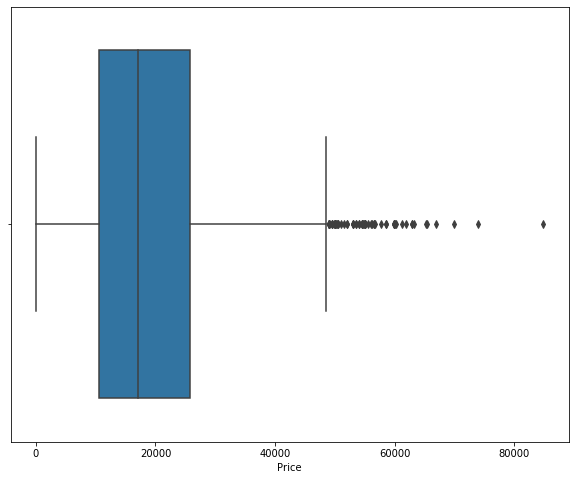

In [40]:
# In order to reveal layouts visually, we shown the price data in boxplot. The layoouts on the left and right sides indicate
# serious deviations, therefore going details on them will be usefull for accuracy.
import seaborn as sns
fig= plt.figure(figsize=(10,8))
sns.boxplot(x=df_joint['Price'])
plt.show()

In [41]:
# Listing data for more expensive cars than $50000, there is no unreasonable price upper price range.
df_joint[df_joint['Price']>50000]

,Make,Model,Year,Age,Price,Title Status,Mileage,Color,Vin Number,Lot Number,State,Country,Liquidation Time,Type,Origin
44,Ford,F-350,2014,6,55000,clean vehicle,15273.0,black,1ft7w3bt5hee88155,167754310,pennsylvania,USA,3.000000,light_truck_com_van,Domestic
49,Ford,F-350,2014,6,54000,clean vehicle,26241.0,black,1ft7w3bt0hef02785,167754311,pennsylvania,USA,3.000000,light_truck_com_van,Domestic
95,BMW,X5,2017,3,53500,clean vehicle,29355.0,blue,5ymkt6c37h0x20696,167765095,michigan,USA,2.000000,suv,European
127,Chevrolet,Silverado 3500,2017,3,53000,clean vehicle,16105.0,black,1gc4k1ey0jf149152,167765123,washington,USA,0.875070,light_truck_com_van,Domestic
277,Dodge,Challenger,2019,1,67000,clean vehicle,10944.0,blue,2c3cdzl97kh518237,167759490,ohio,USA,0.875070,Sedan,Domestic
361,Ford,F-250,2017,3,50412,clean vehicle,47129.0,black,1ft7w2bt3hef41039,167765418,michigan,USA,2.000000,light_truck_com_van,Domestic
380,Harley-Davidson,FLHXS,2014,6,54680,clean vehicle,9502.0,black,1hd1krm1xgb609213,167703374,virginia,USA,0.750060,motor_bike,Domestic
393,Ford,F-450,2013,7,53500,clean vehicle,55732.0,white,1ft8w4dtxhed96692,167765452,michigan,USA,0.833400,light_truck_com_van,Domestic
399,BMW,7-Series,2020,0,61200,clean vehicle,7509.0,black,wba7t2c04lgl17687,167417053,california,USA,7.000000,Sedan,European
403,Ford,F-350,2017,3,51502,clean vehicle,27661.0,black,1ft8w3dt8hec12120,167765457,michigan,USA,2.000000,light_truck_com_van,Domestic


In [42]:
# Listing data for less expensive cars than $1000, there is unreasonable prices lower price range, like 206 number observation
# 2020 Chev's price can't be $25. Such unreasonable prices should be cleaned. 
df_joint[df_joint['Price']<1000]

,Make,Model,Year,Age,Price,Title Status,Mileage,Color,Vin Number,Lot Number,State,Country,Liquidation Time,Type,Origin
188,Chrysler,Concorde,2004,16,175,salvage insurance,231240.0,red,2c3hd46r3yh208325,167756464,north carolina,USA,3.00000,Sedan,Domestic
206,Chevrolet,Equinox,2019,1,25,salvage insurance,7232.0,black,2gnaxkev6l6128374,167756877,kentucky,USA,3.00000,suv,Domestic
209,Chrysler,300,2005,15,25,salvage insurance,151815.0,silver,2c3ja43r35h179032,167757193,massachusetts,USA,3.00000,Sedan,Domestic
263,Ford,Econoline,2003,17,900,clean vehicle,142027.0,white,1ftne24293hb19928,167758752,florida,USA,0.08334,light_truck_com_van,Domestic
284,Dodge,Charger,2006,14,25,salvage insurance,160528.0,dark blue,2b3ka43g87h836300,167416803,minnesota,USA,0.70839,Sedan,Domestic
294,Ford,Fusion,2016,4,725,salvage insurance,67279.0,gray,3fa6p0h75hr150081,167255037,virginia,USA,2.00000,Sedan,Domestic
301,Chevrolet,Cobalt,2008,12,50,salvage insurance,172102.0,blue,1g1al58f787159241,167650632,texas,USA,0.75006,Sedan,Domestic
302,Ford,Focus,2005,15,720,clean vehicle,26914.0,no_color,1fafp36n06w137851,167660576,florida,USA,0.95841,Sedan,Domestic
319,Chevrolet,Silverado,2010,10,25,salvage insurance,149189.0,white,3gcrkse37ag234620,167650663,colorado,USA,0.75006,light_truck_com_van,Domestic
327,Chevrolet,Colorado,2012,8,25,salvage insurance,105244.0,white,1gccsbf97b8118236,167650664,colorado,USA,0.75006,light_truck_com_van,Domestic


In [43]:
# There are reasonable doubts for cars their prices less then $100. All of them salvage insurance titled. since we can not
# confirm those prices, dropping them will be better accuracy.
print('The percentage of data with less than $50 price:{:.4f}% '.format((df_joint['Price'][df_joint['Price']<=50].count()/len(df_joint))))
df_joint[df_joint['Price']<=50]

The percentage of data with less than $50 price:0.0081% 


,Make,Model,Year,Age,Price,Title Status,Mileage,Color,Vin Number,Lot Number,State,Country,Liquidation Time,Type,Origin
206,Chevrolet,Equinox,2019,1,25,salvage insurance,7232.0,black,2gnaxkev6l6128374,167756877,kentucky,USA,3.00000,suv,Domestic
209,Chrysler,300,2005,15,25,salvage insurance,151815.0,silver,2c3ja43r35h179032,167757193,massachusetts,USA,3.00000,Sedan,Domestic
284,Dodge,Charger,2006,14,25,salvage insurance,160528.0,dark blue,2b3ka43g87h836300,167416803,minnesota,USA,0.70839,Sedan,Domestic
301,Chevrolet,Cobalt,2008,12,50,salvage insurance,172102.0,blue,1g1al58f787159241,167650632,texas,USA,0.75006,Sedan,Domestic
319,Chevrolet,Silverado,2010,10,25,salvage insurance,149189.0,white,3gcrkse37ag234620,167650663,colorado,USA,0.75006,light_truck_com_van,Domestic
327,Chevrolet,Colorado,2012,8,25,salvage insurance,105244.0,white,1gccsbf97b8118236,167650664,colorado,USA,0.75006,light_truck_com_van,Domestic
359,Chevrolet,Tahoe,2007,13,25,salvage insurance,130623.0,white,1gnfc13j88r167278,167650817,california,USA,8.00000,suv,Domestic
362,Ford,F-150,2005,15,25,salvage insurance,206162.0,white,1ftdf15y2rnb12612,167361489,georgia,USA,2.00000,light_truck_com_van,Domestic
383,Chevrolet,Suburban,2008,12,25,salvage insurance,194903.0,gray,3gnfk16307g310044,167651207,virginia,USA,2.00000,suv,Domestic
386,GMC,Envoy,2007,13,25,salvage insurance,138441.0,white,1gkdt13s332100344,167362657,michigan,USA,2.00000,suv,Domestic


In [44]:
#Dropping row with less than $50.
df_joint = df_joint[df_joint['Price']>=50]
print('The percentage of data with less than $50 price:{:.4f}% '.format(df_joint['Price'][df_joint['Price']<=50].count()/len(df_joint)))

The percentage of data with less than $50 price:0.0008% 


In [45]:
#observations 504,1236,1619 should be imputed
df_joint[df_joint['Mileage']==0]

,Make,Model,Year,Age,Price,Title Status,Mileage,Color,Vin Number,Lot Number,State,Country,Liquidation Time,Type,Origin
504,Peterbilt,587,2012,8,100,salvage insurance,0.0,blue,1xp4d49x1cd144875,167529787,florida,USA,0.70839,heawy_truck,Domestic
1236,Ford,Focus,2015,5,4200,clean vehicle,0.0,no_color,1fadp3j23dl155179,167773673,pennsylvania,USA,2.00000,Sedan,Domestic
1619,Ford,Focus,2017,3,650,salvage insurance,0.0,black,1fadp3k21hl268441,167651911,california,USA,2.00000,Sedan,Domestic


In [46]:
# imputation of 0 mileage peterbilt 
df_joint['Mileage'][(df_joint['Make']=='Peterbilt') & (df_joint['Year']==2012)]

490    902041.0
504         0.0
Name: Mileage, dtype: float64

In [47]:
# same value imputaded
df_joint.loc[504,'Mileage']=902041.0

In [48]:
# imputation of 0 mileage ford
# avarage imputaded
df_joint.loc[1236,'Mileage']=df_joint['Mileage'][(df_joint['Make']=='Ford') & (df_joint['Year']== 2015) & (df_joint['Mileage']>0) ].mean()
# avarage imputaded
df_joint.loc[1619,'Mileage']=df_joint['Mileage'][(df_joint['Make']=='Ford') & (df_joint['Year']== 2017) & (df_joint['Mileage']>0) ].mean()

In [49]:
df_joint[df_joint.isnull().any(axis=1)]

,Make,Model,Year,Age,Price,Title Status,Mileage,Color,Vin Number,Lot Number,State,Country,Liquidation Time,Type,Origin


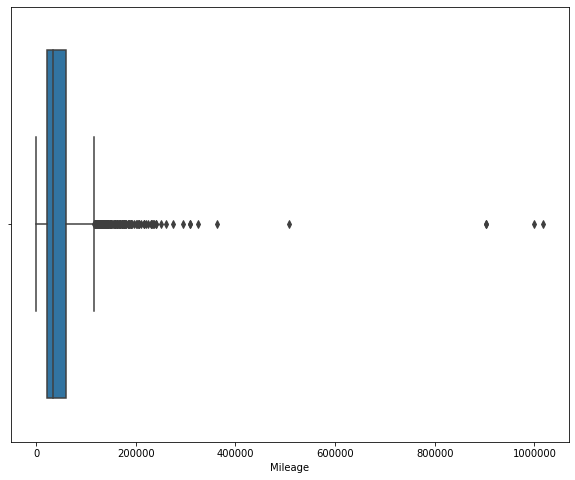

In [50]:
# As seen from boxplot, there is unreasonable mileages in some observations.
fig= plt.figure(figsize=(10,8))
sns.boxplot(x=df_joint['Mileage'])
plt.show()

In [51]:
# right-side outliers are reasonable
df_joint[df_joint['Mileage']>250000]

,Make,Model,Year,Age,Price,Title Status,Mileage,Color,Vin Number,Lot Number,State,Country,Liquidation Time,Type,Origin
0,Toyota,FJ Cruiser,2008,12,6300,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,USA,10.00000,suv,Asian
182,Chevrolet,Express,2009,11,3800,clean vehicle,261648.0,white,1gbhg396191112177,167756420,michigan,USA,2.00000,light_truck_com_van,Domestic
197,Ford,F-550,2017,3,15700,clean vehicle,309564.0,white,1fduf5gt8bea80212,167756640,south carolina,USA,0.87507,light_truck_com_van,Domestic
311,Chevrolet,Silverado,2008,12,7320,clean vehicle,325611.0,silver,1gchk23648f125262,167660581,florida,USA,0.91674,light_truck_com_van,Domestic
367,Chevrolet,Silverado 3500,2005,15,2725,salvage insurance,308451.0,black,1gcjc33204f177273,167650940,south carolina,USA,2.00000,light_truck_com_van,Domestic
447,Ford,F-150,2002,18,75,salvage insurance,295780.0,gold,1ftrw08l61kc05834,167357592,arkansas,USA,0.70839,light_truck_com_van,Domestic
490,Peterbilt,587,2012,8,475,salvage insurance,902041.0,gold,1xp4d49x9cd123630,167529786,florida,USA,0.70839,heawy_truck,Domestic
504,Peterbilt,587,2012,8,100,salvage insurance,902041.0,blue,1xp4d49x1cd144875,167529787,florida,USA,0.70839,heawy_truck,Domestic
528,Peterbilt,387,2010,10,1025,salvage insurance,1017936.0,color:,1xp7d49x0ad793710,167529842,georgia,USA,0.70839,heawy_truck,Domestic
531,Chevrolet,Silverado,2002,18,2000,clean vehicle,507985.0,red,1gcgc24u53z128586,167781223,wisconsin,USA,0.87507,light_truck_com_van,Domestic


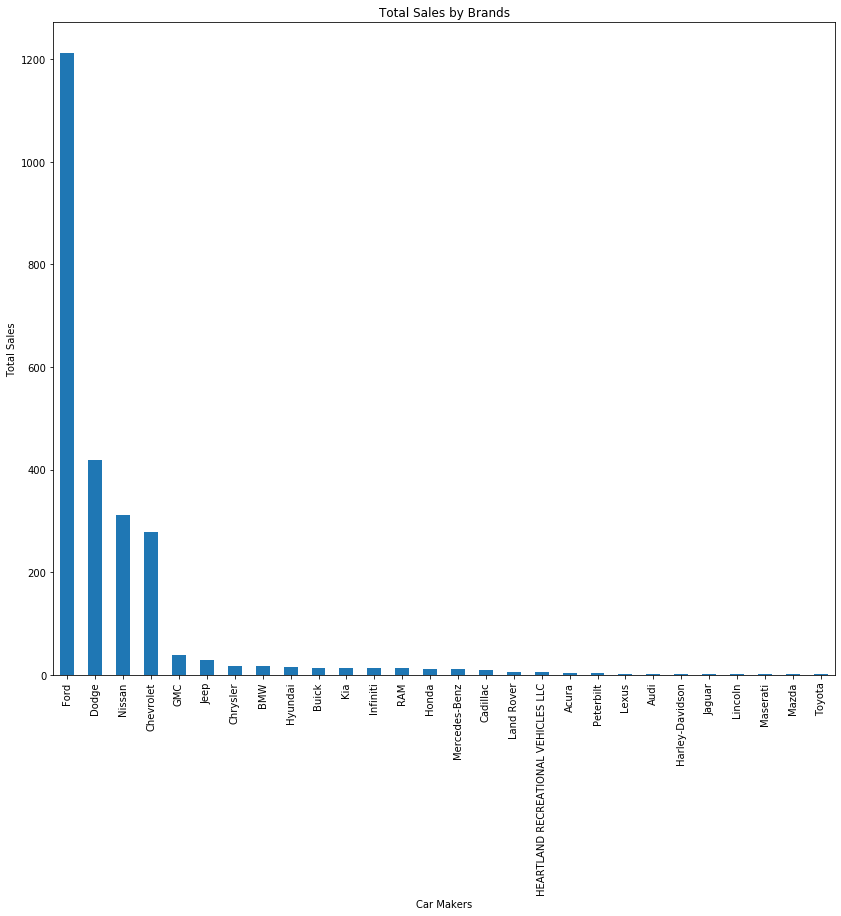

In [52]:
#Car Sales by brand
plt.figure(figsize=(14,12))
df_joint.groupby('Make')['Make'].agg('count').sort_values(ascending=False).plot(kind='bar',title='Total Sales by Brands')
plt.xlabel('Car Makers')
plt.ylabel('Total Sales')
plt.show()

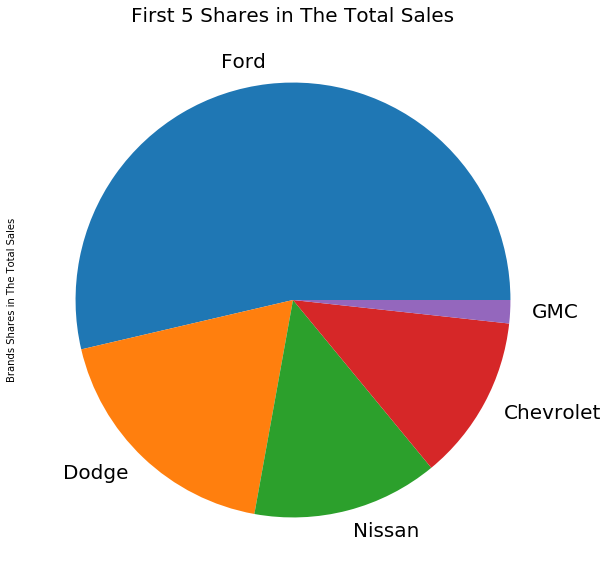

In [53]:
df00 = df_joint.groupby('Make')['Make'].agg('count').sort_values(ascending=False)
df01 = pd.DataFrame(df00, columns = ['Make'] )
df01['Brands Shares in The Total Sales'] = round(df01['Make']/df01['Make'].sum(),4)*100
df02 = df01.iloc[:5,1]
plt.figure(figsize=(12,10))
df02.plot.pie(labels=["Ford", "Dodge",'Nissan','Chevrolet','GMC'],fontsize=20)
plt.title('First 5 Shares in The Total Sales',fontsize=20)
plt.show()


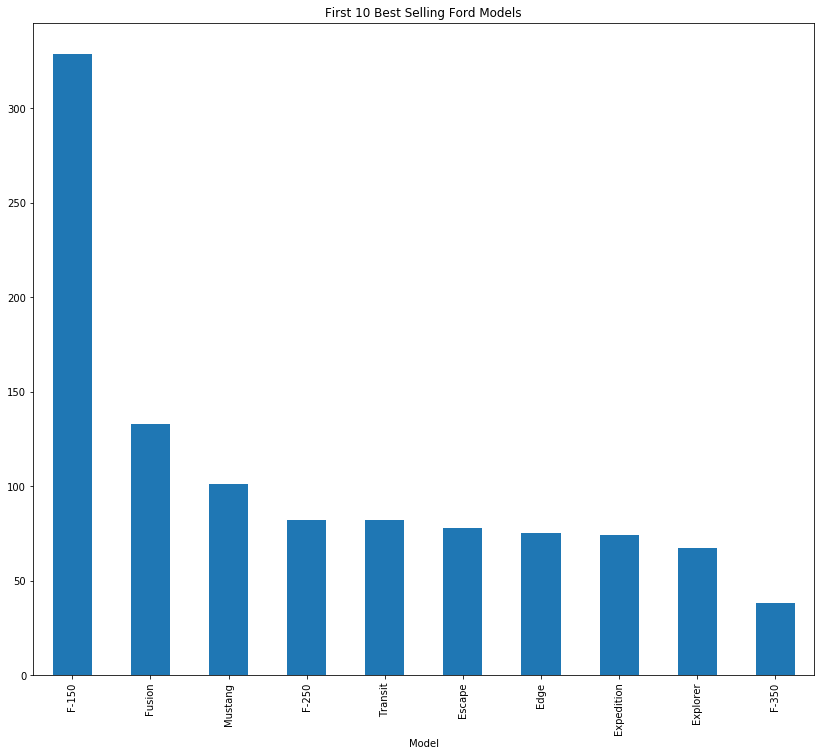

In [54]:
plt.figure(figsize=(14,12))
df_joint[df_joint['Make']=='Ford'].groupby('Model')['Model'].agg('count').sort_values(ascending=False)[0:10].plot(kind='bar',title='First 10 Best Selling Ford Models')
plt.show()

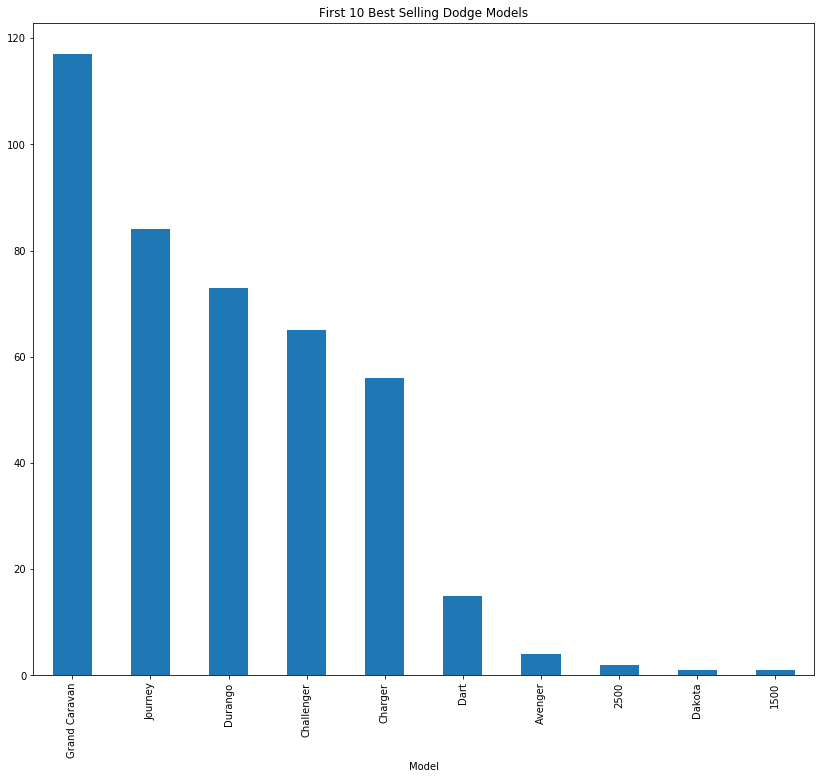

In [55]:
plt.figure(figsize=(14,12))
df_joint[df_joint['Make']=='Dodge'].groupby('Model')['Model'].agg('count').sort_values(ascending=False)[0:10].plot(kind='bar',title='First 10 Best Selling Dodge Models')
plt.show()

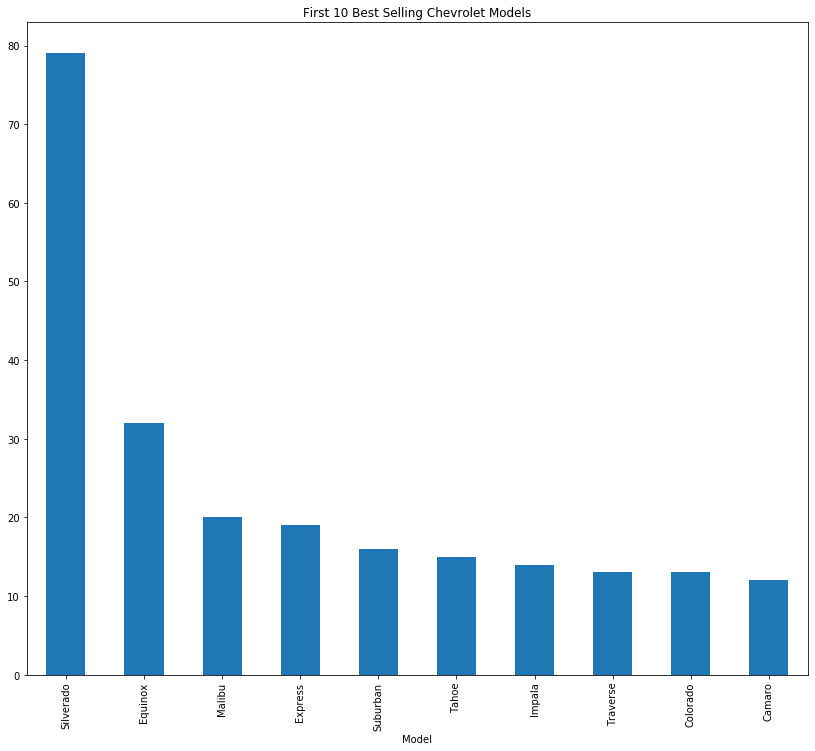

In [56]:
plt.figure(figsize=(14,12))
df_joint[df_joint['Make']=='Chevrolet'].groupby('Model')['Model'].agg('count').sort_values(ascending=False)[0:10].plot(kind='bar',title='First 10 Best Selling Chevrolet Models')
plt.show()

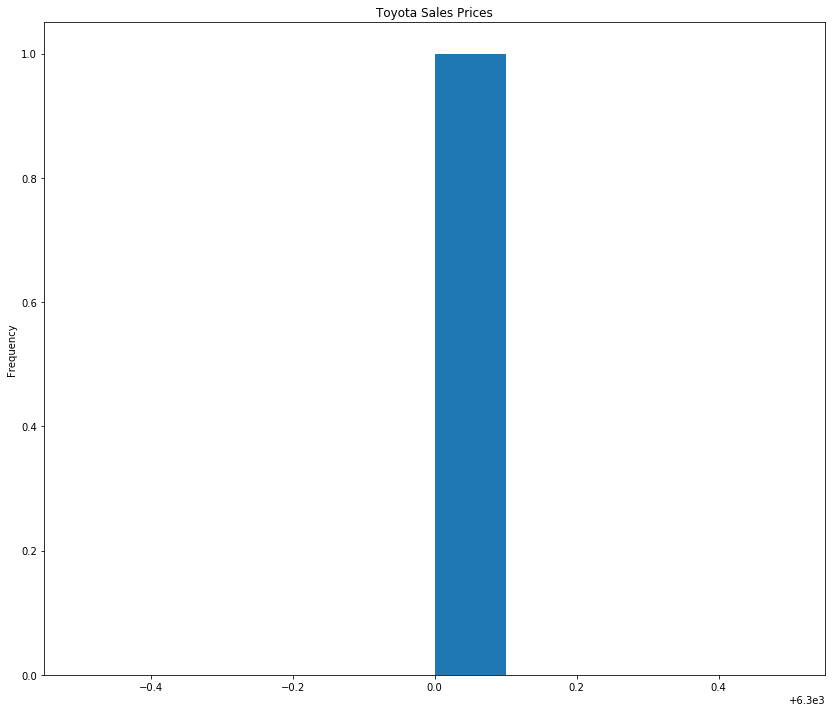

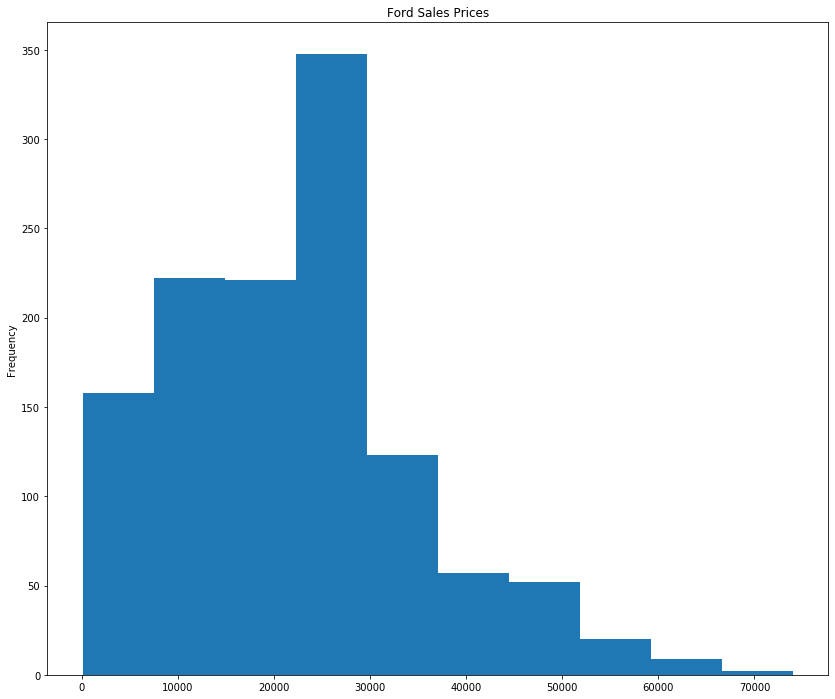

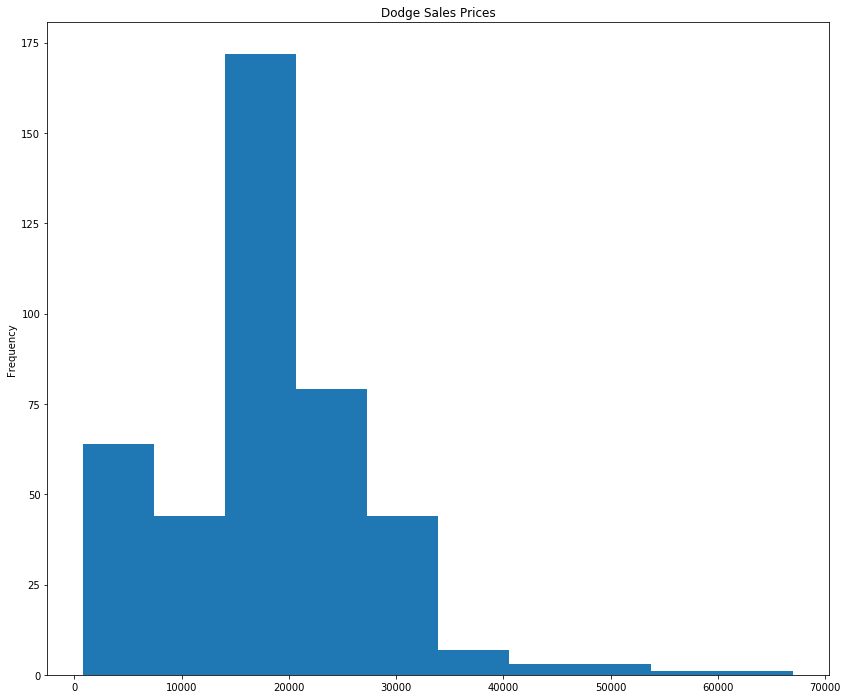

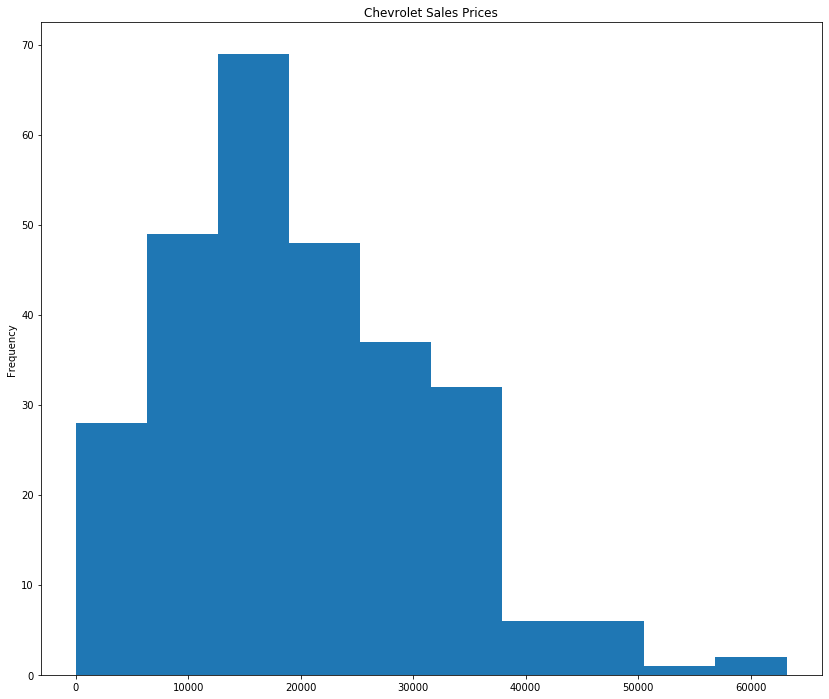

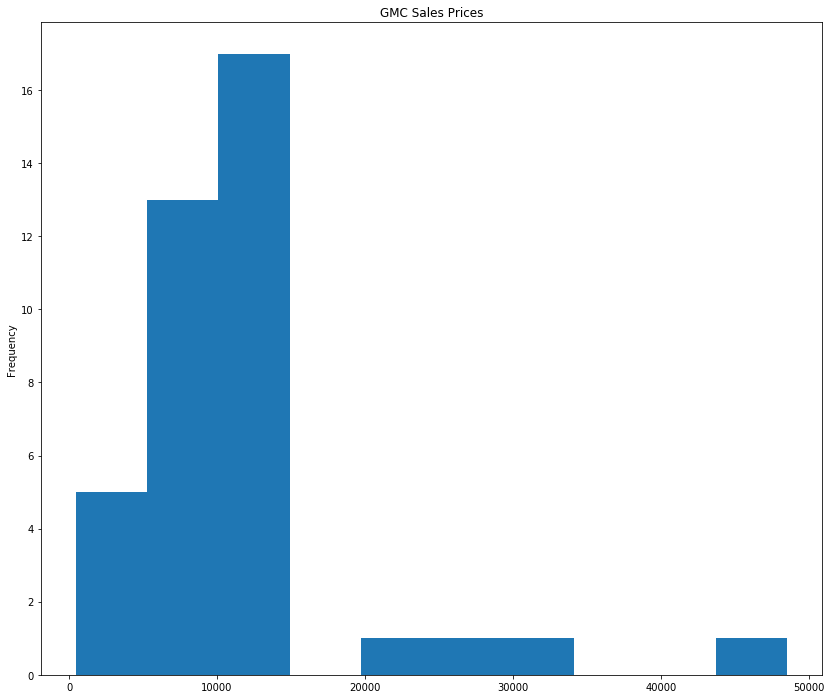

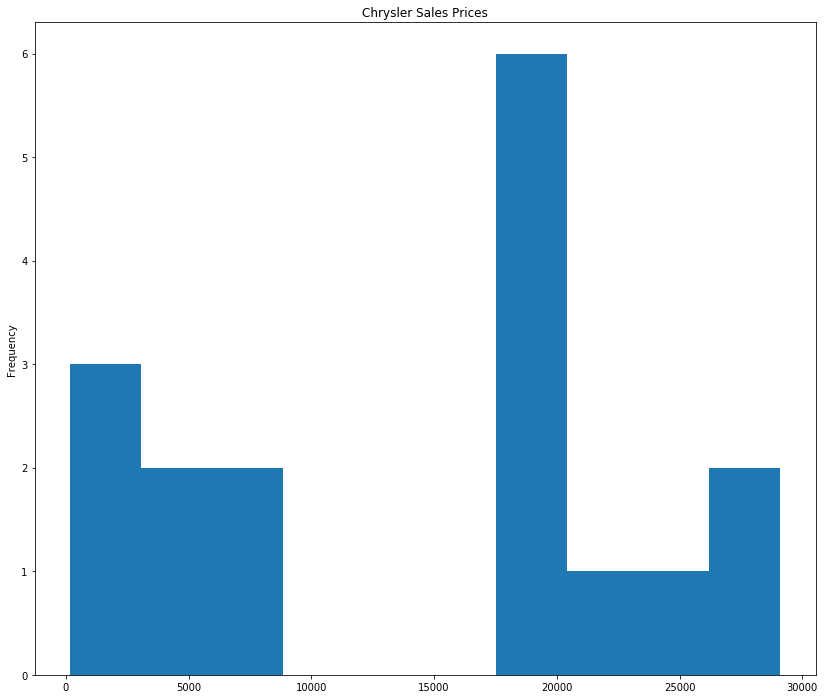

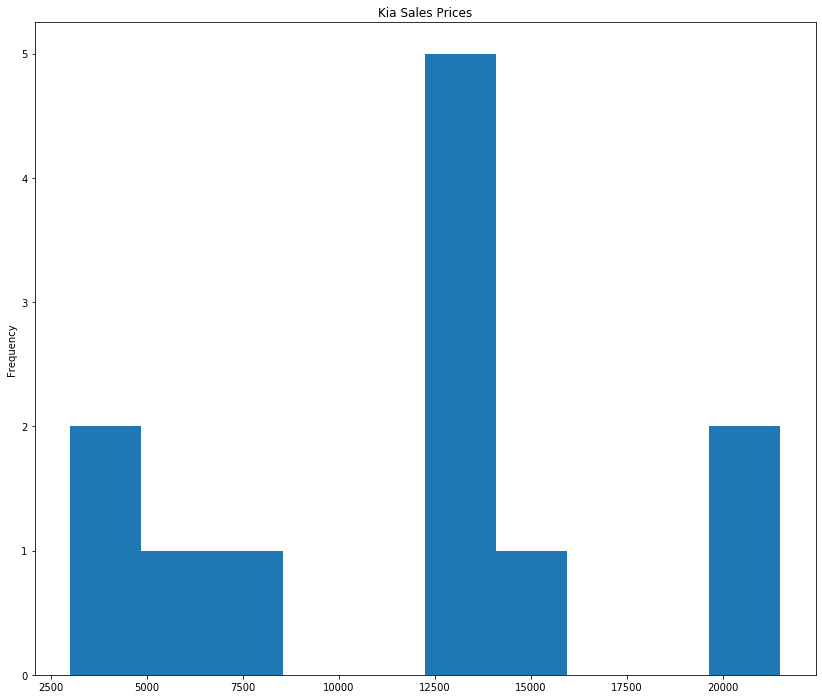

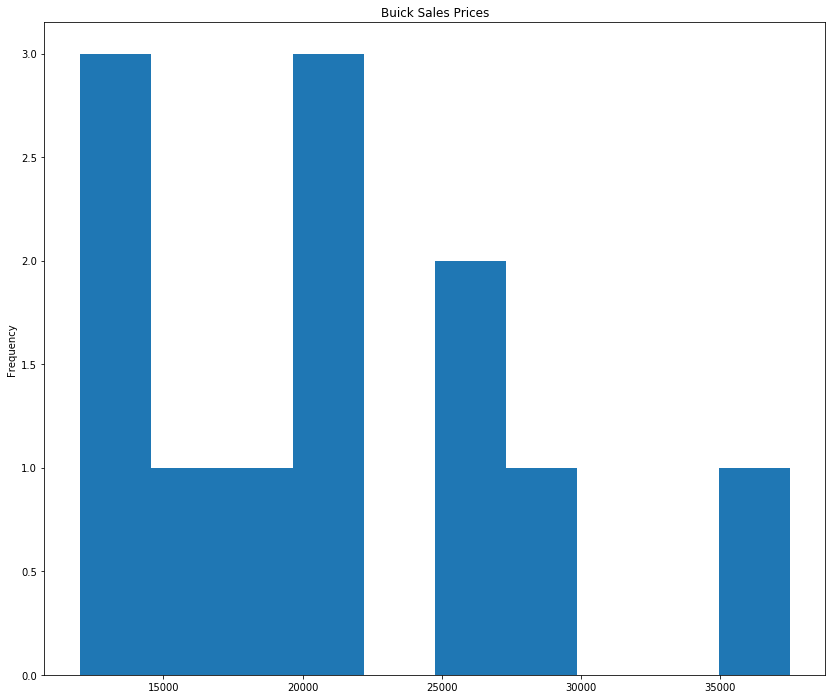

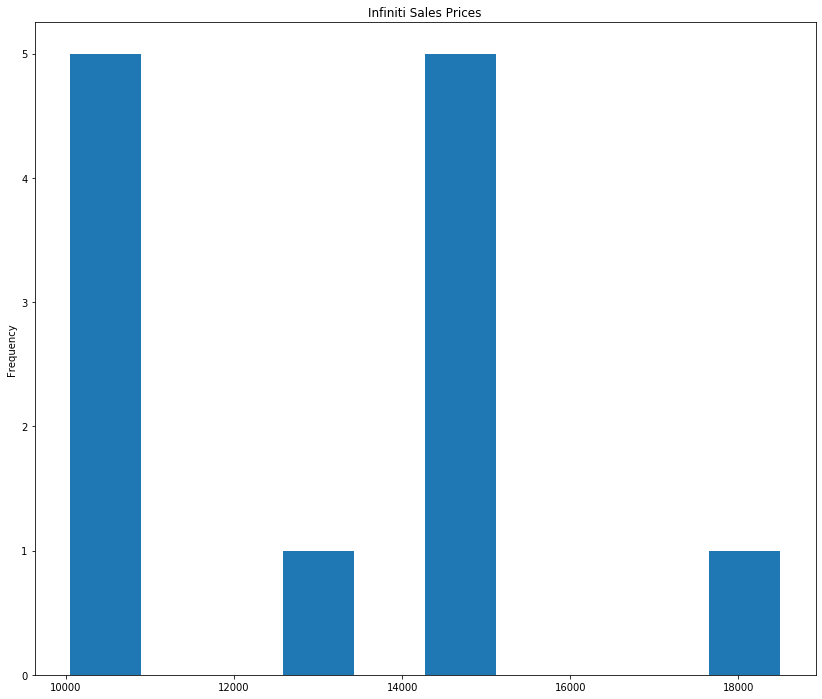

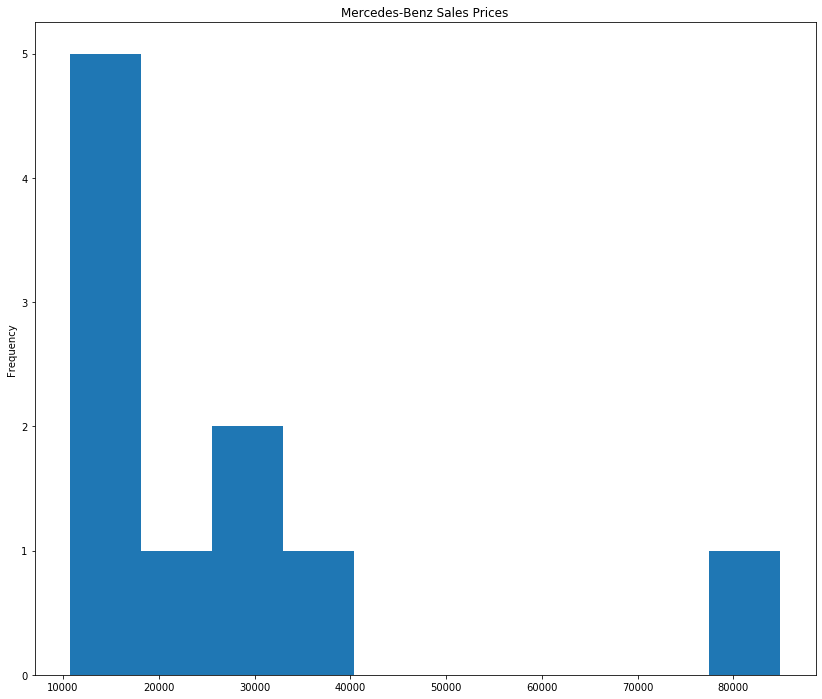

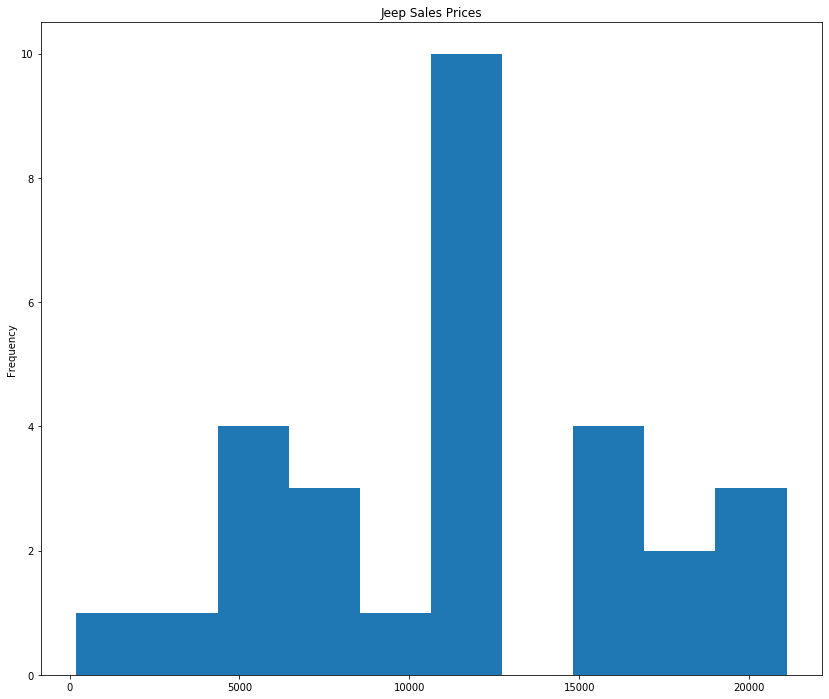

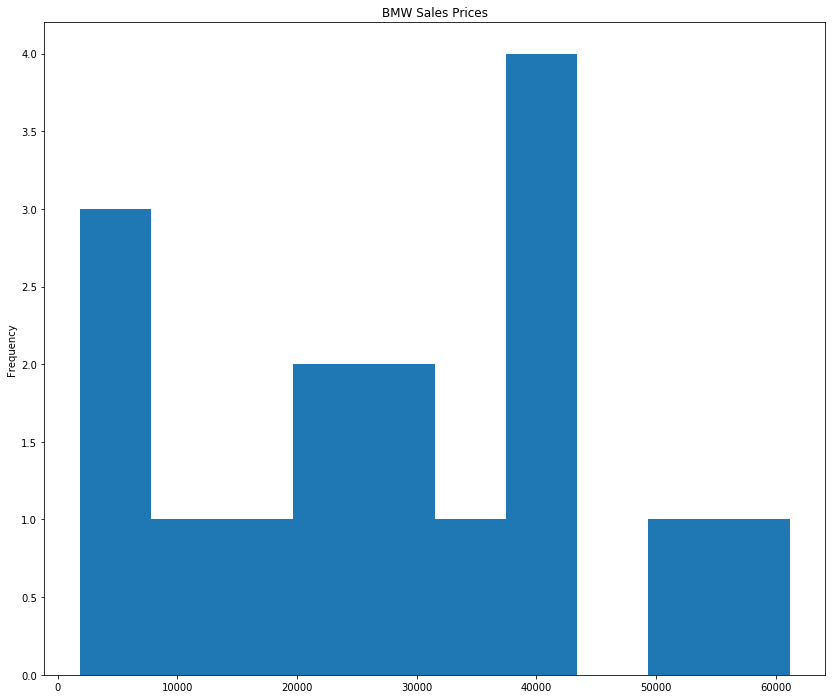

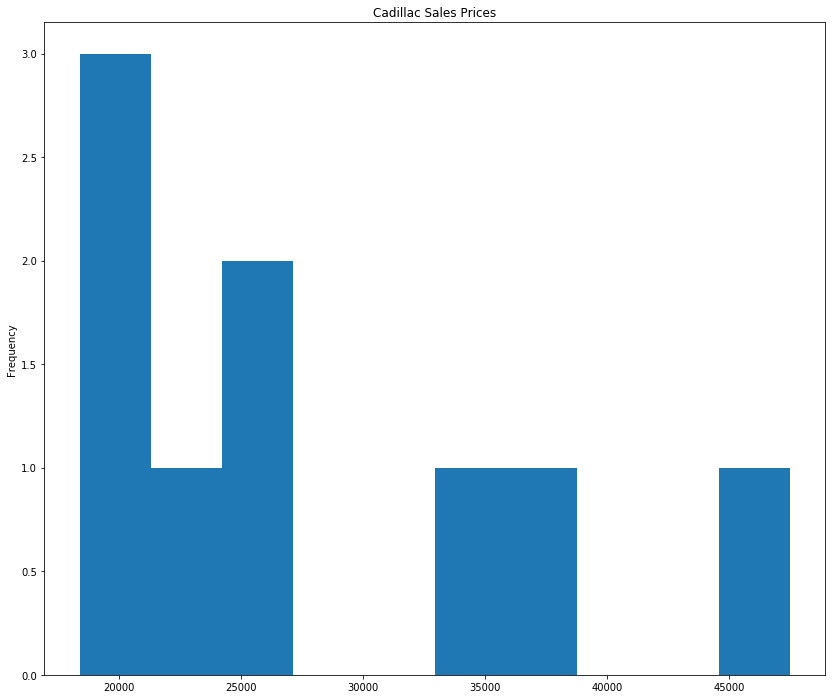

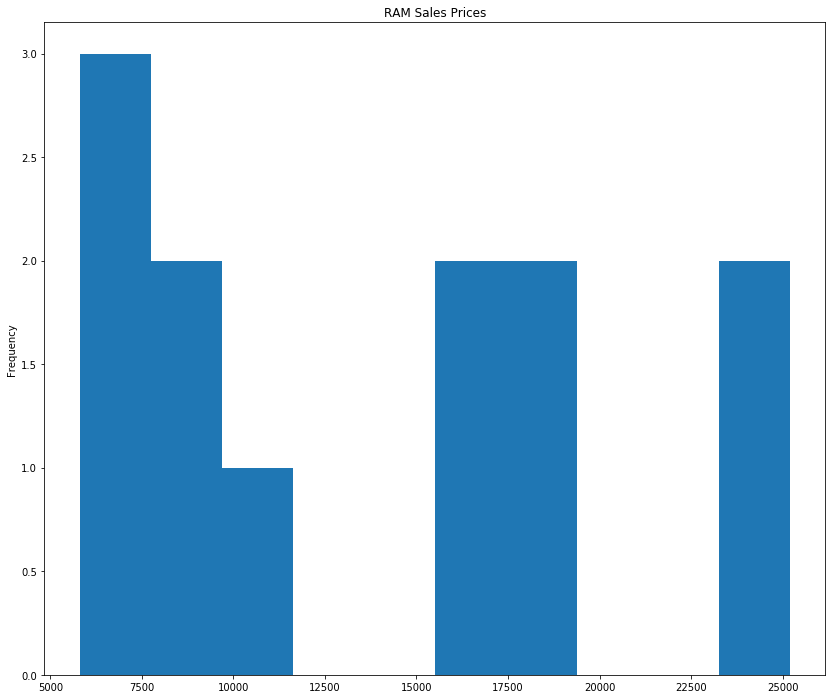

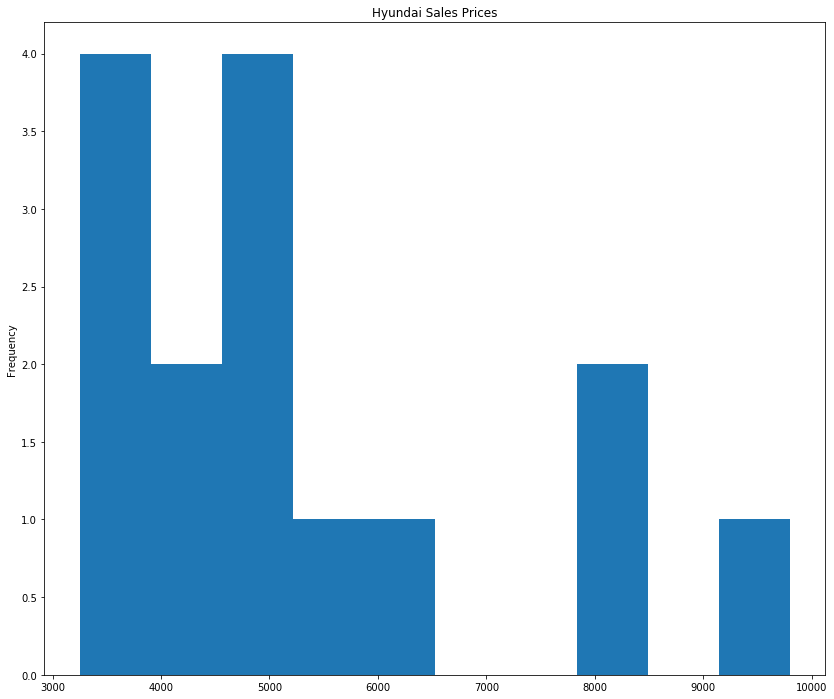

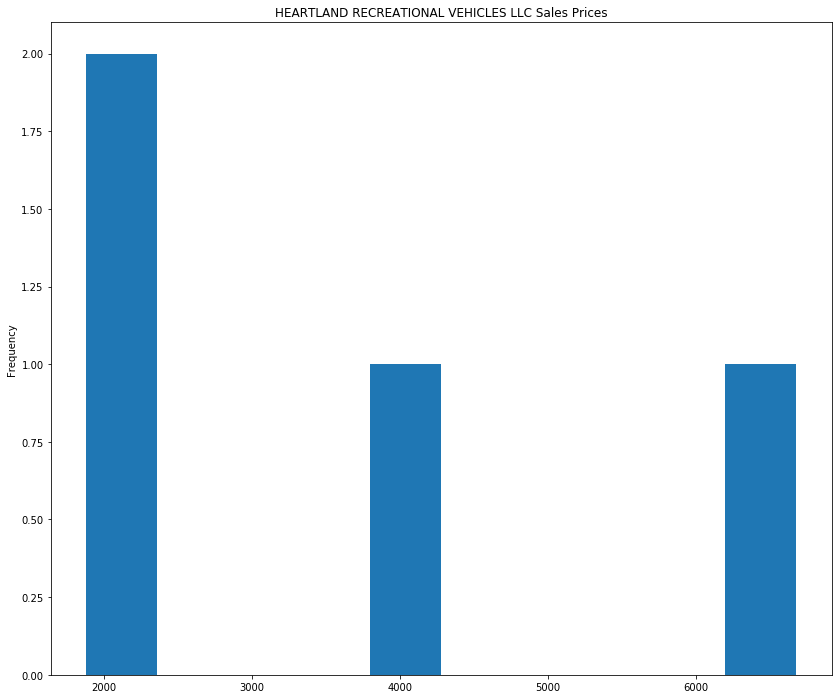

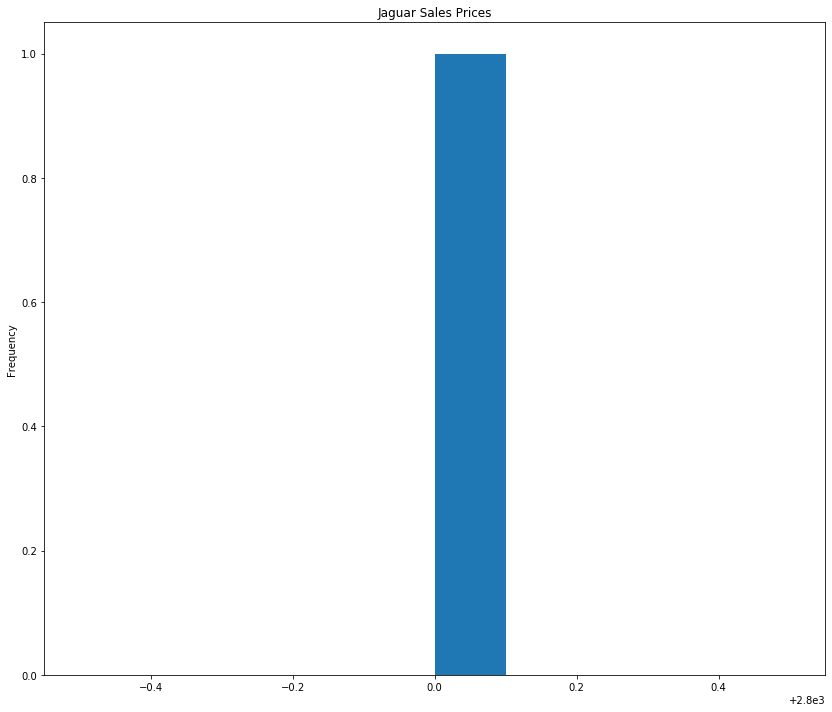

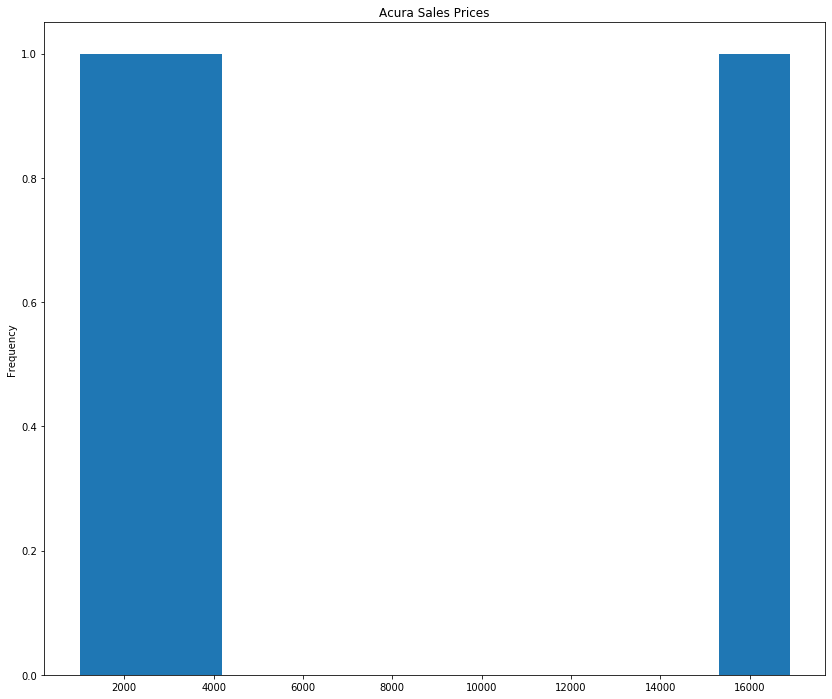

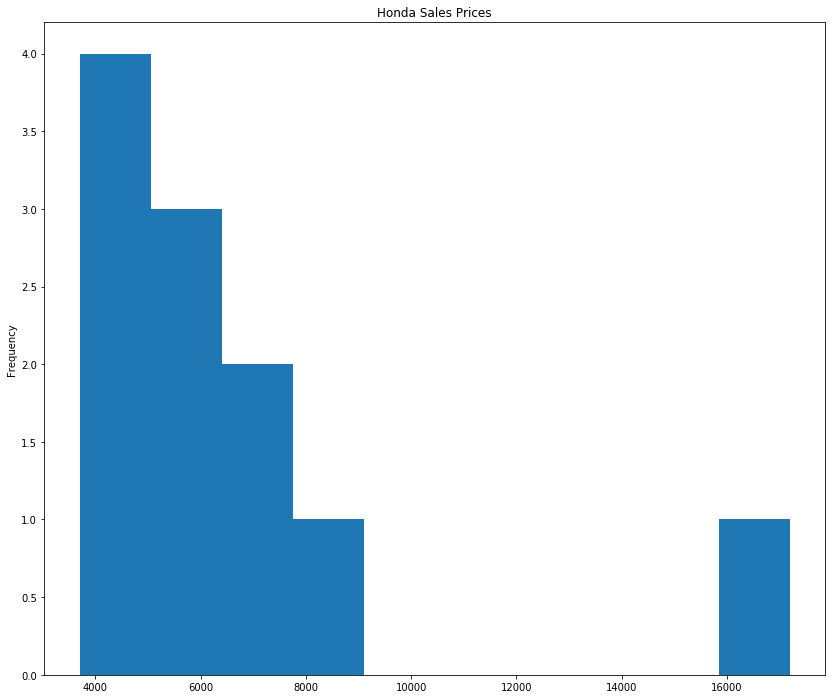

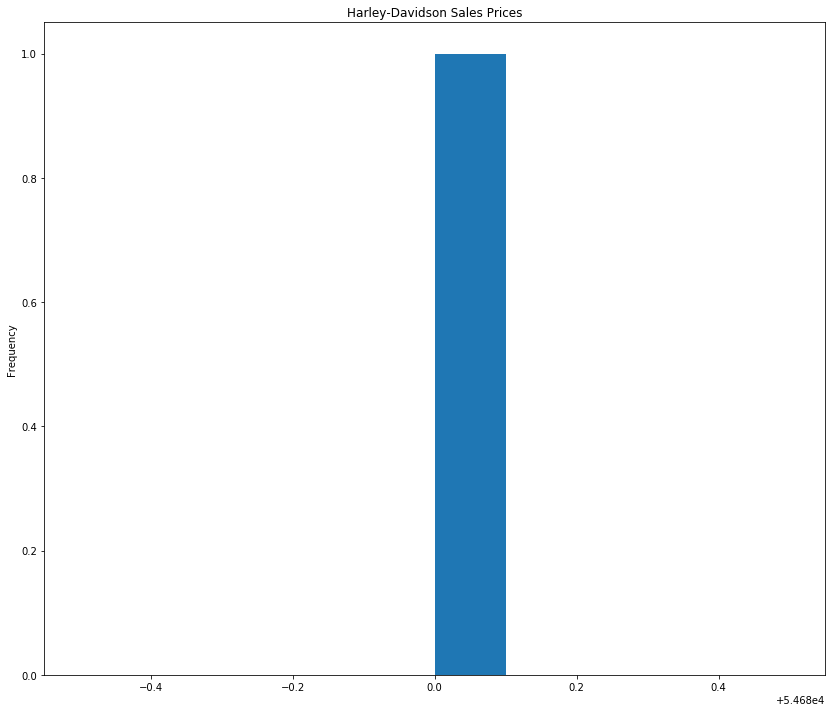

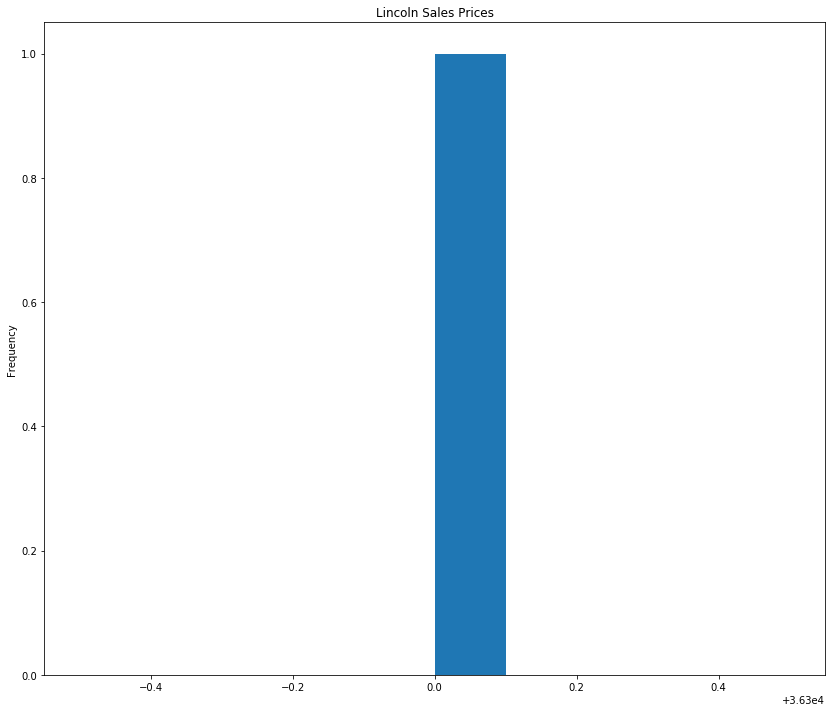

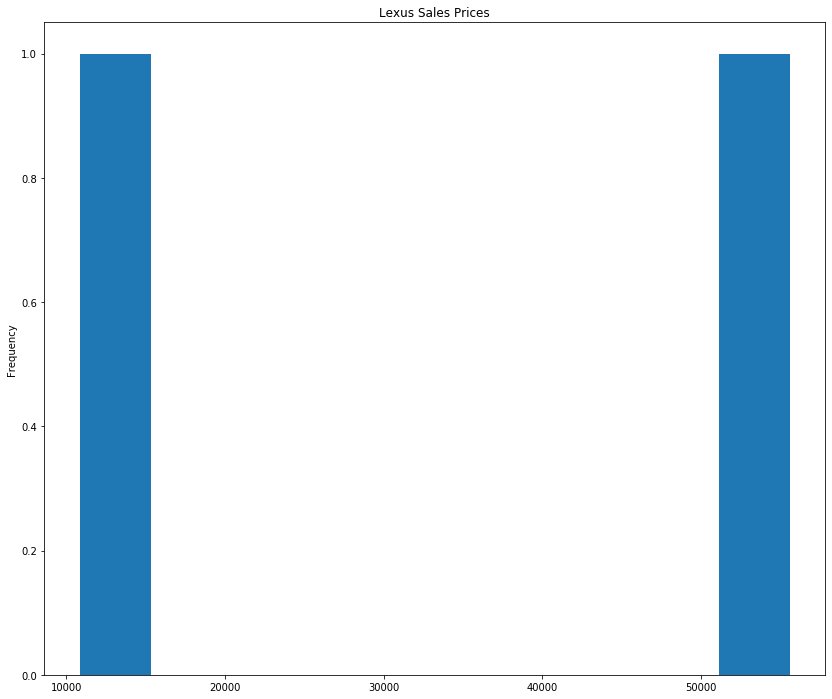

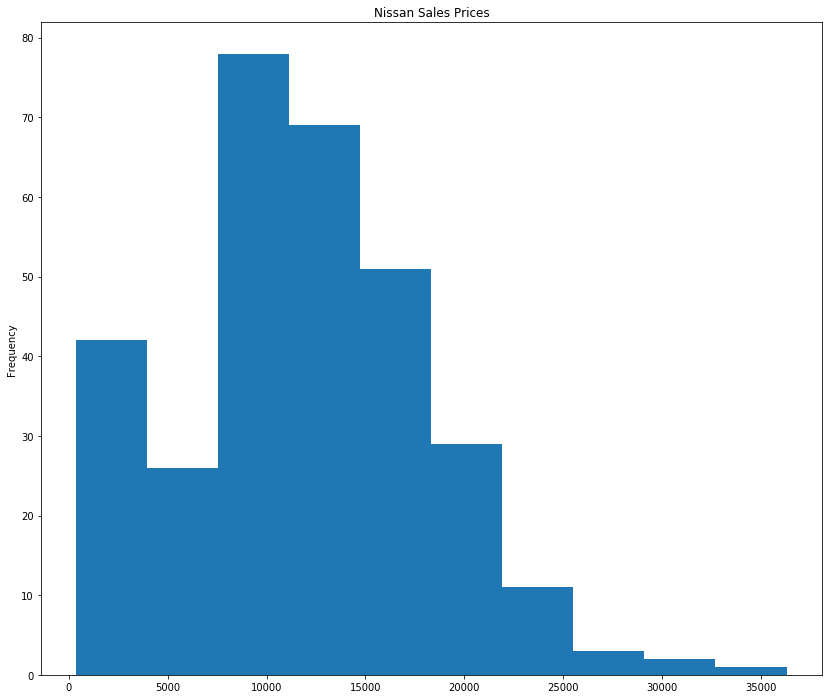

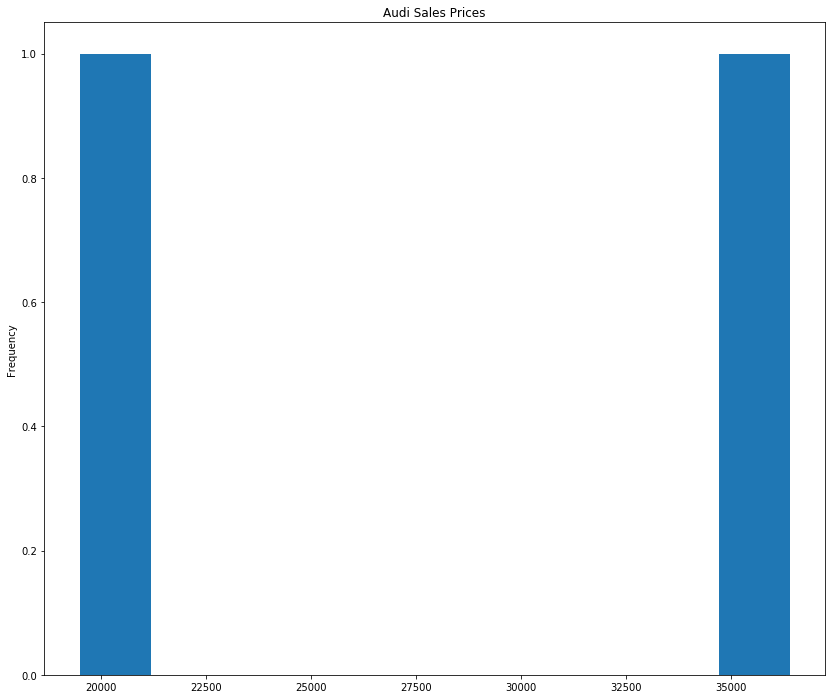

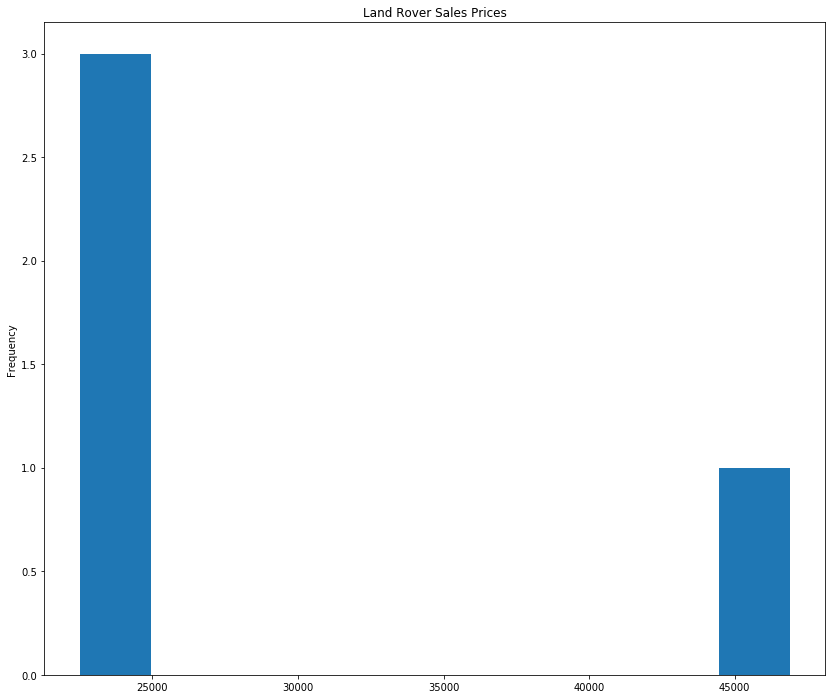

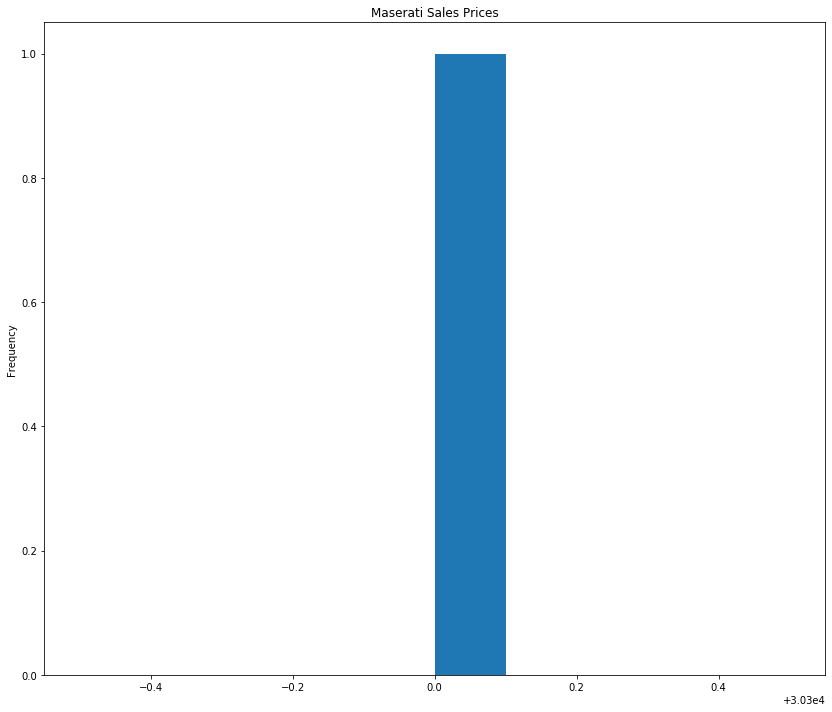

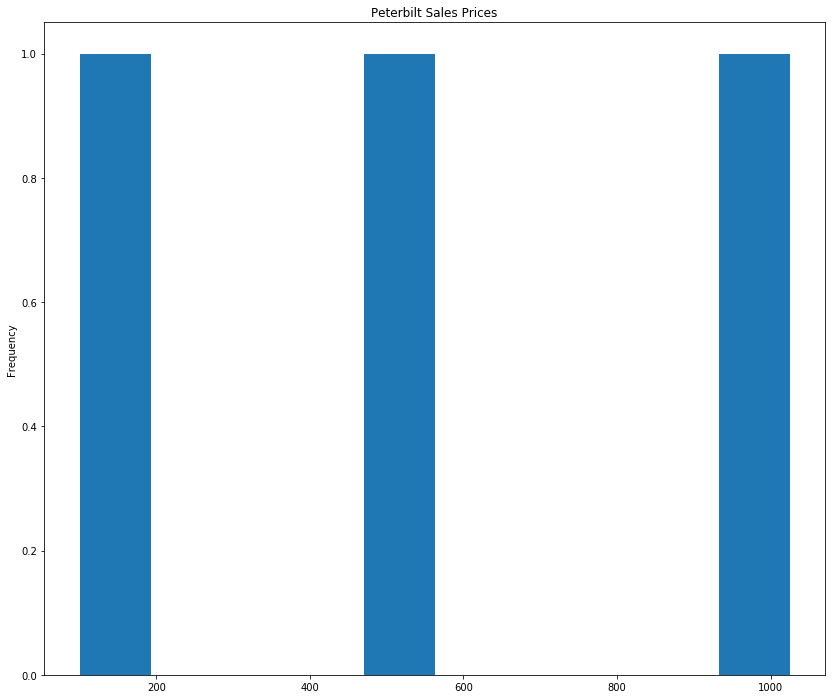

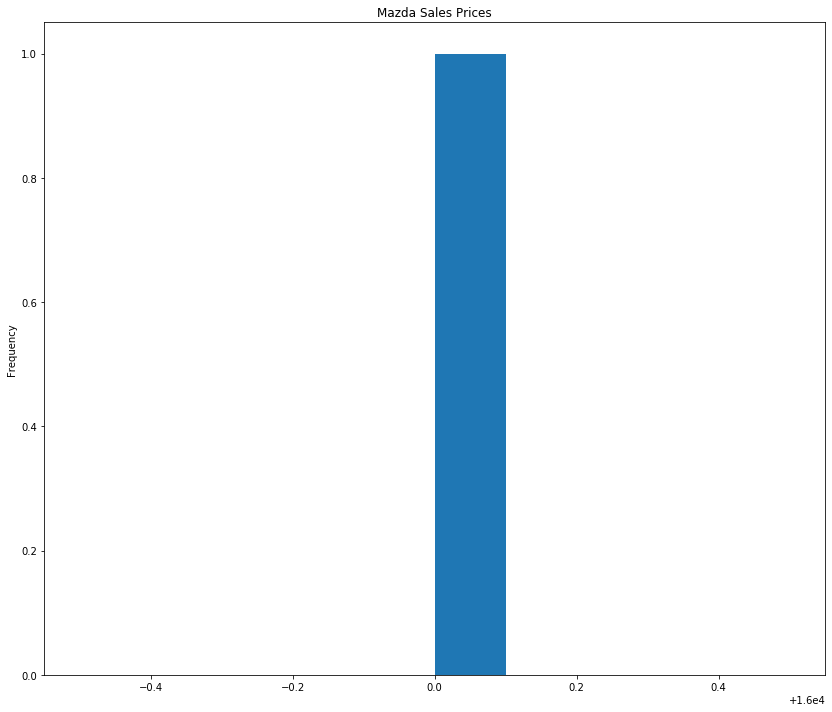

In [57]:
for i in df_joint['Make'].unique():
    plt.figure(figsize=(14,12))
    df_joint['Price'][df_joint['Make']==i].plot(kind='hist',title=i+' Sales Prices')
    plt.show()

In [58]:
The_cheapest_car_sold = df_joint[['Make','Model','Year','Price']][df_joint['Price']==df_joint['Price'].min()]
print(The_cheapest_car_sold)

          Make   Model  Year  Price
301  Chevrolet  Cobalt  2008     50
518  Chevrolet  Cobalt  2008     50


In [59]:
The_most_expensive_car_sold = df_joint[['Make','Model','Year','Price']][df_joint['Price']==df_joint['Price'].max()]
print(The_most_expensive_car_sold)

              Make     Model  Year  Price
502  Mercedes-Benz  SL-Class  2017  84900


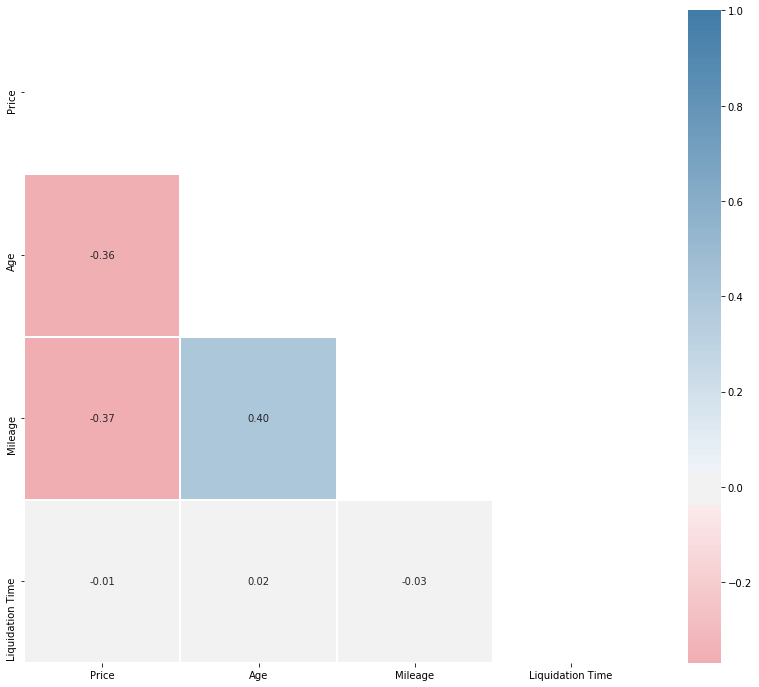

In [60]:
df11 = df_joint[['Price','Age','Mileage','Liquidation Time']]
# Correlation Matrix and visualazing it on heat map
corr = df11.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(h_neg=10,h_pos=240,as_cmap=True)
figure = plt.figure(figsize=(14,12))
sns.heatmap(df11.corr(), mask=mask,center=0, cmap=cmap, linewidths=1,annot=True, fmt=".2f")
plt.show()

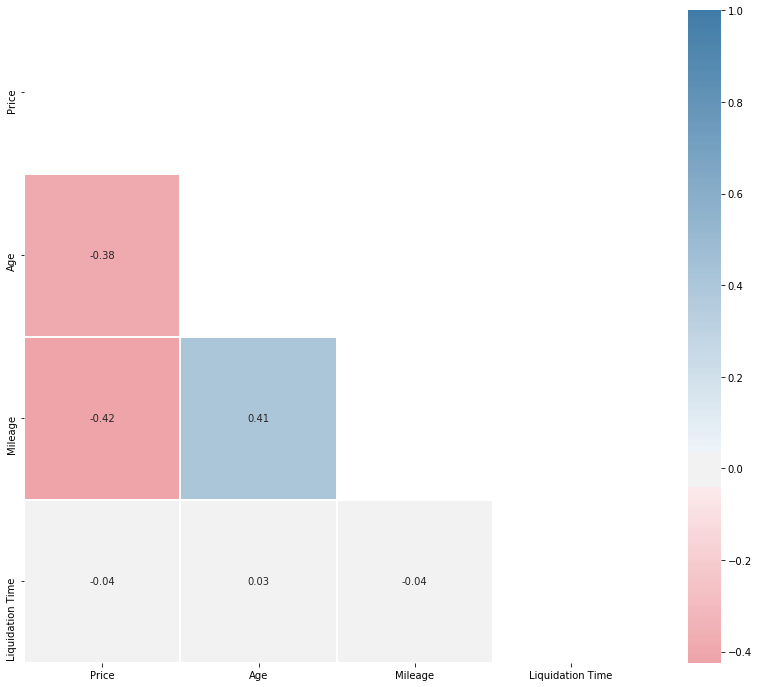

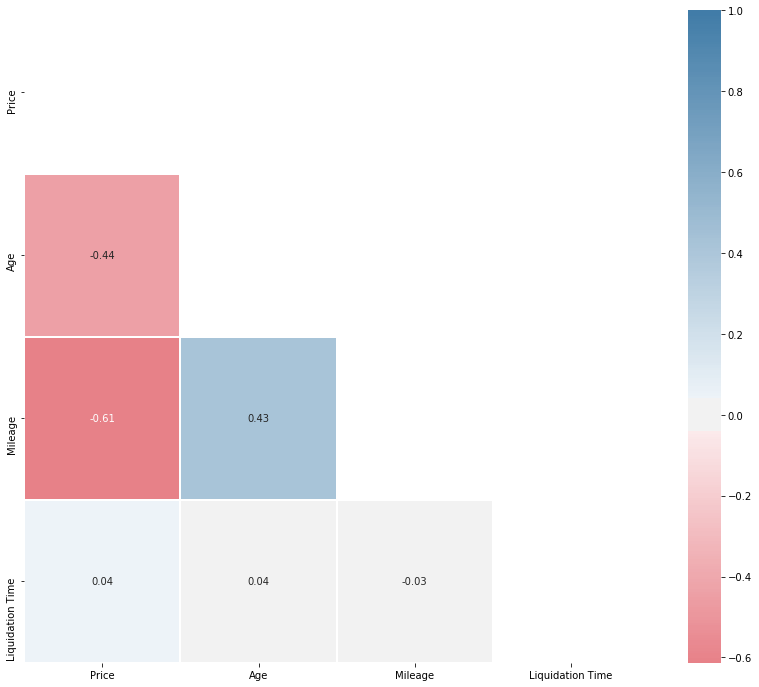

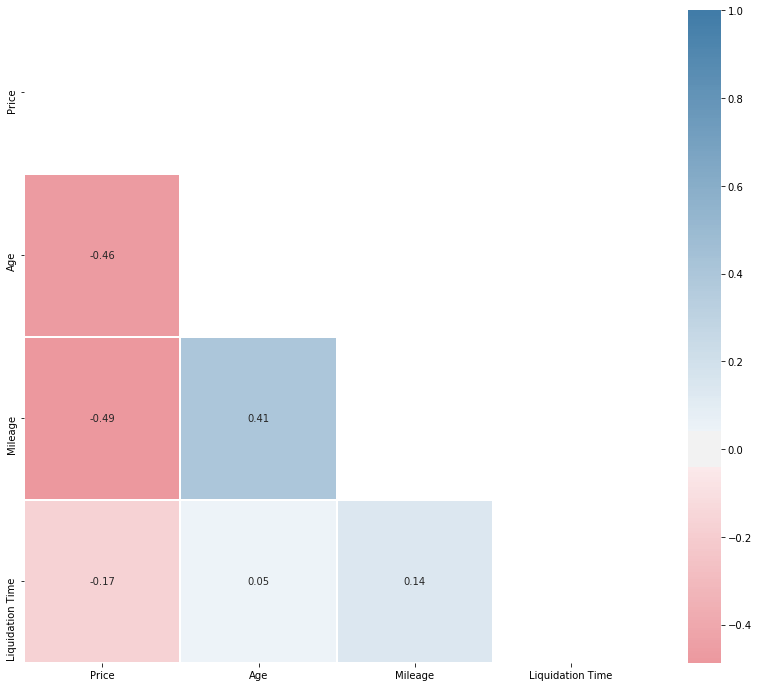

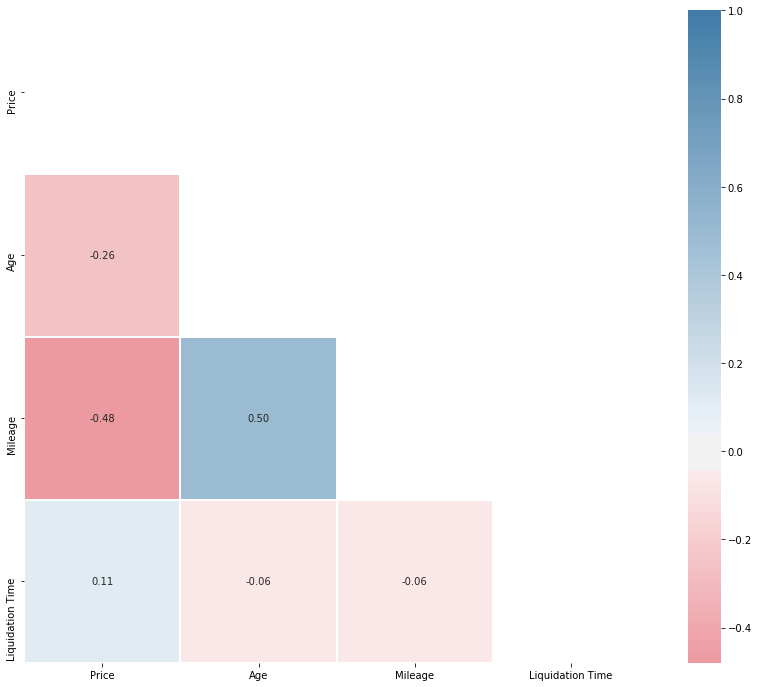

In [61]:
for i in ['Ford','Dodge','Nissan','Chevrolet']:
    df111 = df_joint[['Price','Age','Mileage','Liquidation Time']][df_joint['Make']==i]
    # Correlation Matrix and visualazing it on heat map
    corr = df111.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette(h_neg=10,h_pos=240,as_cmap=True)
    figure = plt.figure(figsize=(14,12))
    sns.heatmap(df111.corr(), mask=mask,center=0, cmap=cmap, linewidths=1,annot=True, fmt=".2f")
    plt.show()
    

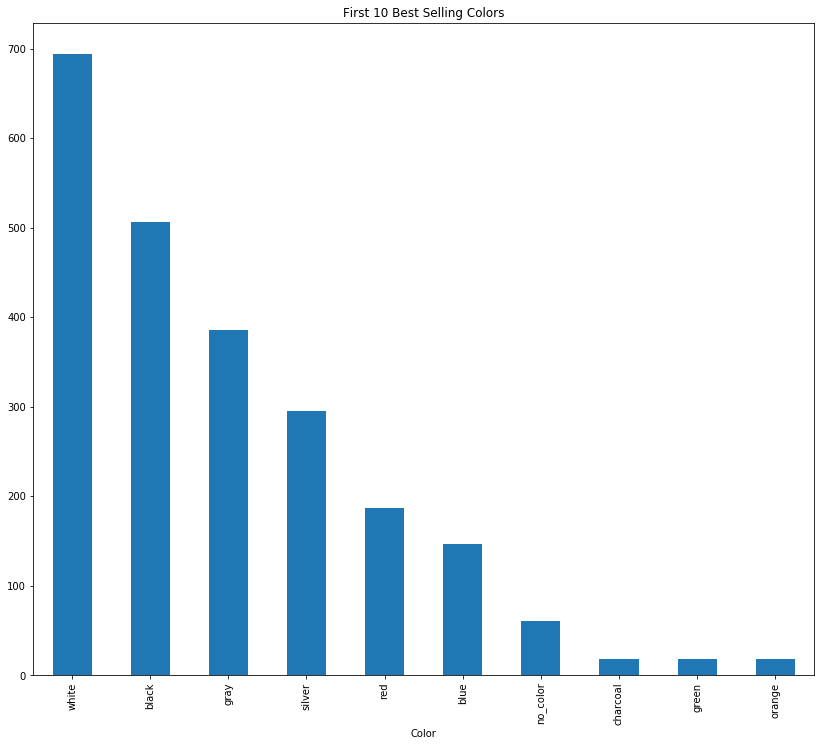

In [62]:
plt.figure(figsize=(14,12))
df_joint.groupby('Color')['Color'].agg('count').sort_values(ascending=False)[0:10].plot(kind='bar',title='First 10 Best Selling Colors')
plt.show()

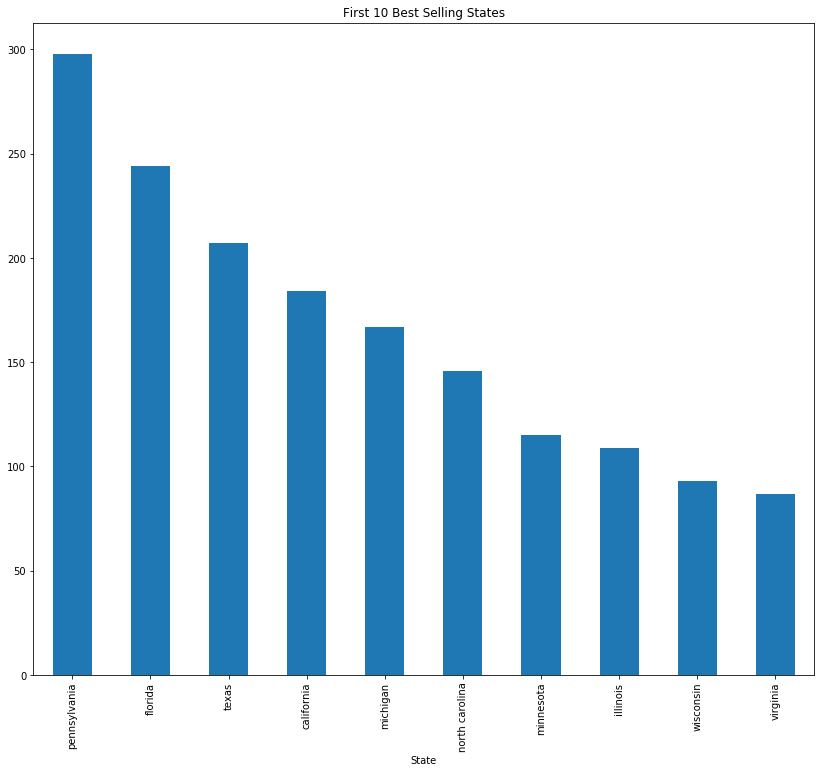

In [63]:
plt.figure(figsize=(14,12))
df_joint.groupby('State')['State'].agg('count').sort_values(ascending=False)[0:10].plot(kind='bar',title='First 10 Best Selling States')
plt.show()

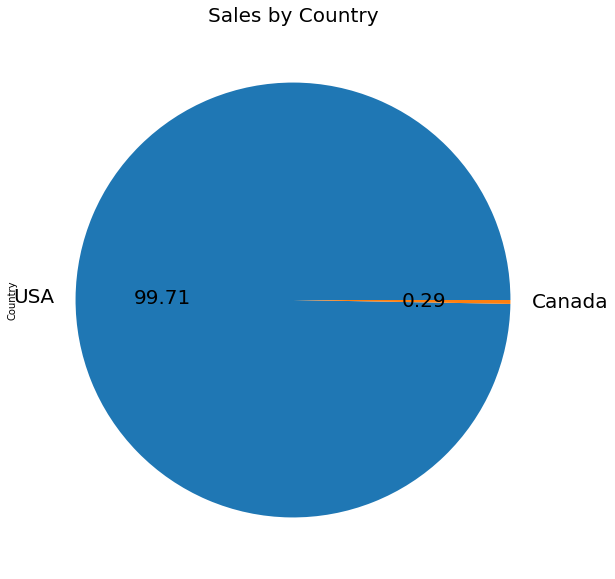

In [64]:
plt.figure(figsize=(12,10))
df_joint.groupby('Country')['Country'].agg('count').sort_values(ascending=False).plot.pie(labels=['USA','Canada'],
autopct="%.2f",fontsize=20)
plt.title('Sales by Country',fontsize=20)
plt.show()

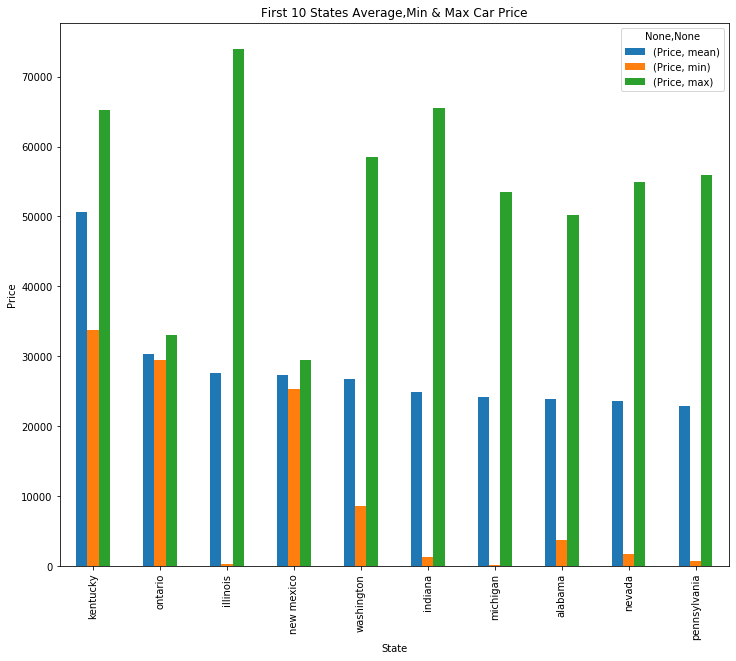

In [65]:
car_selling_price_by_state = df_joint.groupby(['State']).agg({'Price': ['mean', 'min', 'max']})
ax=car_selling_price_by_state.sort_values(by=('Price', 'mean'),ascending=False)[:10].plot.bar(title='First 10 States Average,Min & Max Car Price',
                                                                             figsize=(12,10))
ax.set_ylabel('Price') 
plt.show()

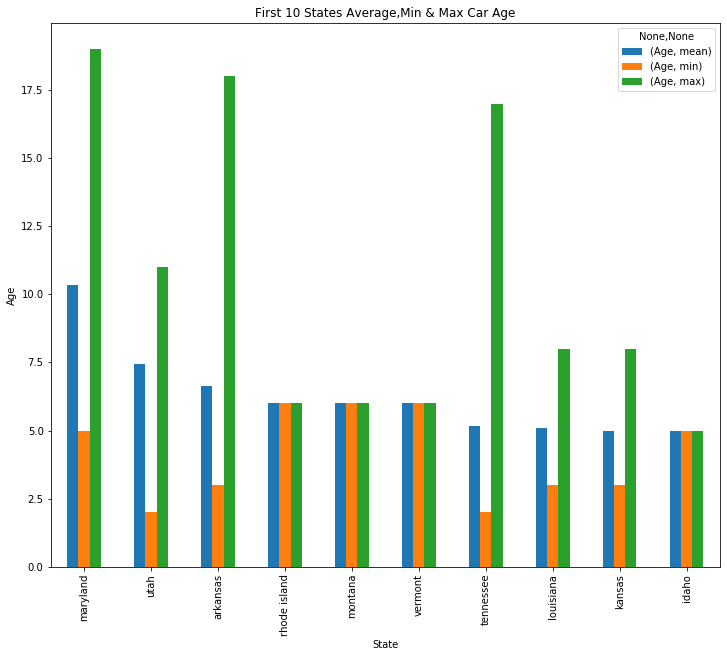

In [66]:
car_age_by_state = df_joint.groupby(['State']).agg({'Age': ['mean', 'min', 'max']})
ax=car_age_by_state.sort_values(by=('Age', 'mean'),ascending=False)[:10].plot.bar(title='First 10 States Average,Min & Max Car Age',
                                                                             figsize=(12,10))
ax.set_ylabel('Age') 
plt.show()

                         Total Cars Sold
Make      Model                         
Ford      F-150                      329
          Fusion                     133
Dodge     Grand Caravan              117
Ford      Mustang                    101
Nissan    Rogue                       99
Dodge     Journey                     84
Ford      F-250                       82
          Transit                     82
Chevrolet Silverado                   79
Ford      Escape                      78


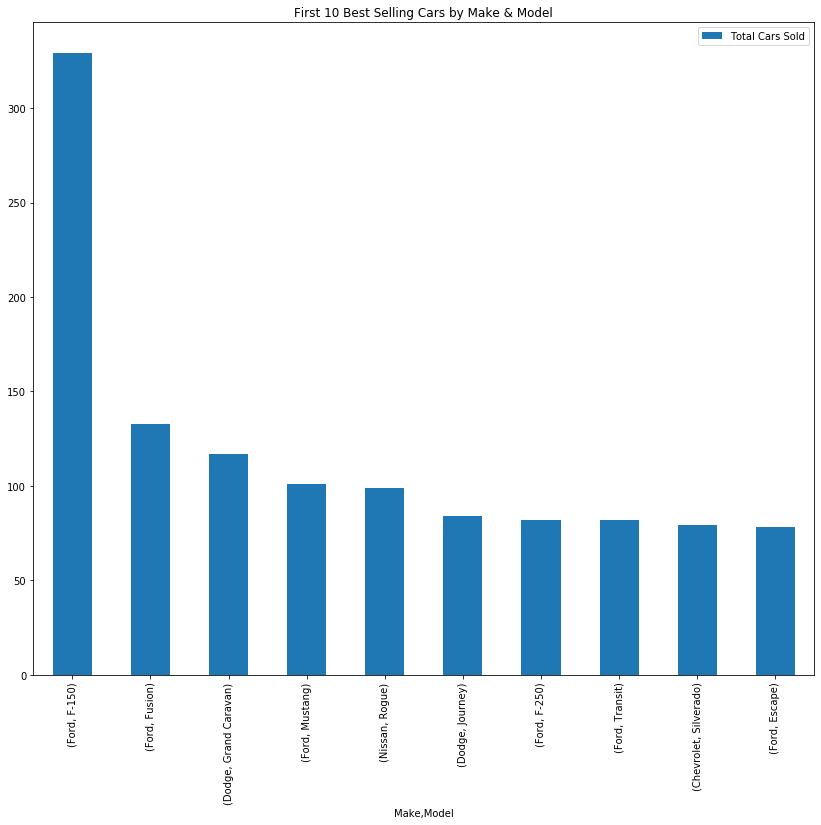

In [67]:
df_temp00 = df_joint[['Make','Model']]
df_temp00['Total Cars Sold'] = np.ones(len(df_temp00))
print(df_temp00.groupby(['Make','Model']).count().sort_values(by='Total Cars Sold',ascending=False)[0:10])

df_temp00.groupby(['Make','Model']).count().sort_values(by='Total Cars Sold',ascending=False)[0:10].plot(kind='bar',figsize=(14,12),
                                                                                                         title ='First 10 Best Selling Cars by Make & Model' )
plt.show()

In [68]:
state_list = ['california','michigan','north carolina','minnesota','illinois','wisconsin','virginia','pennsylvania','florida','texas']

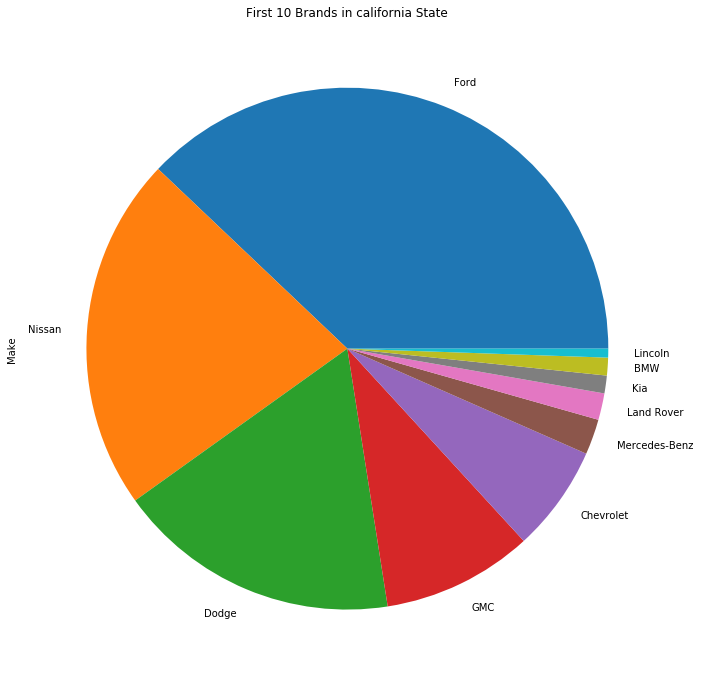

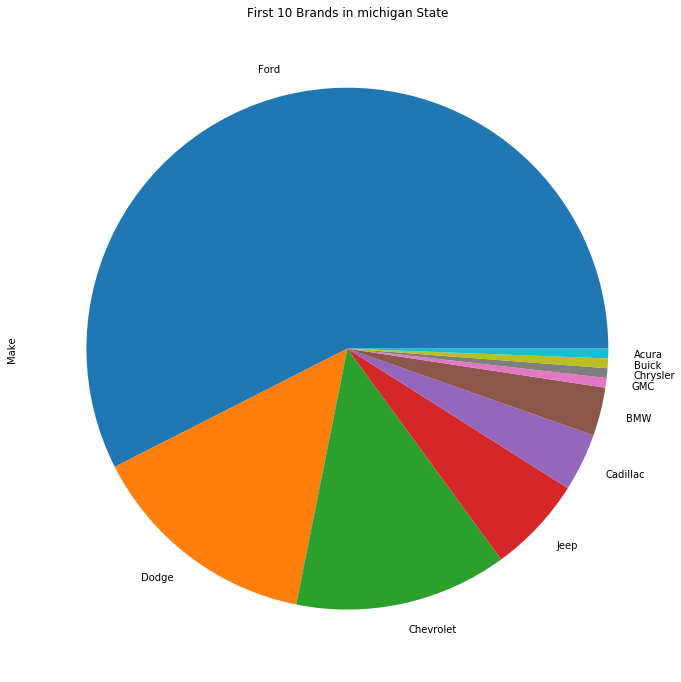

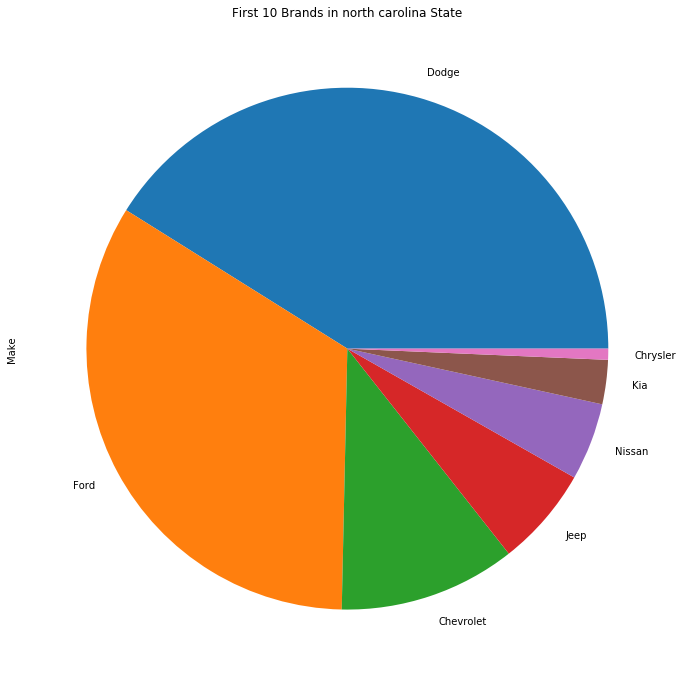

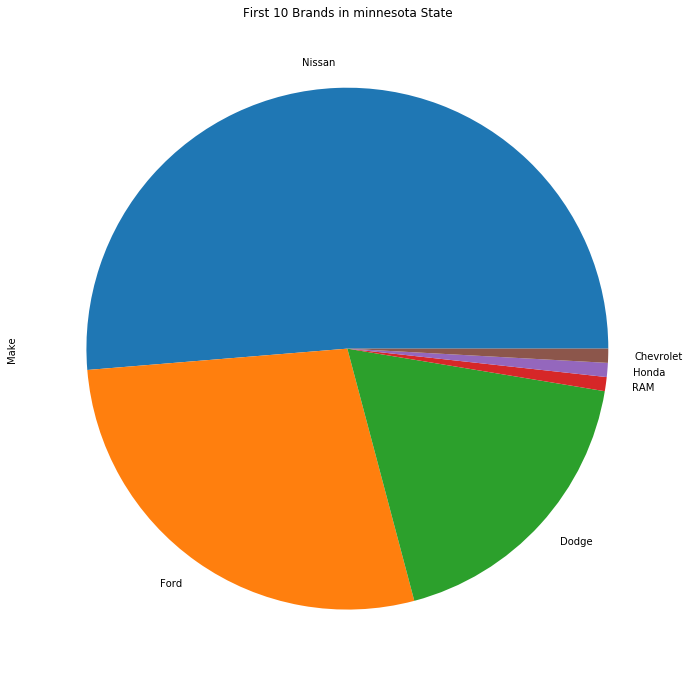

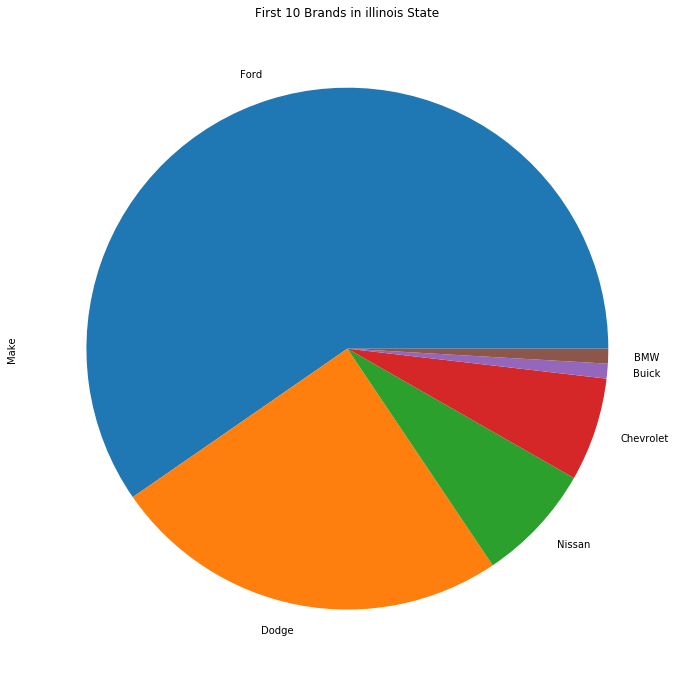

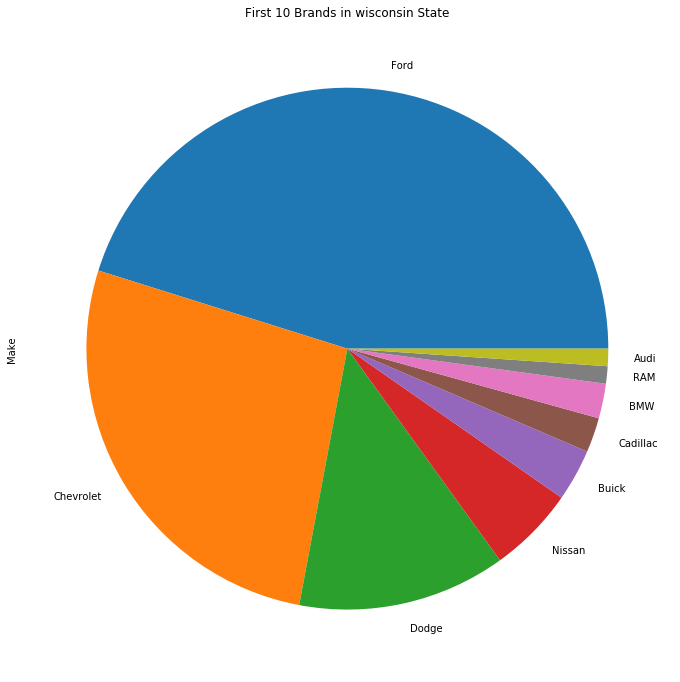

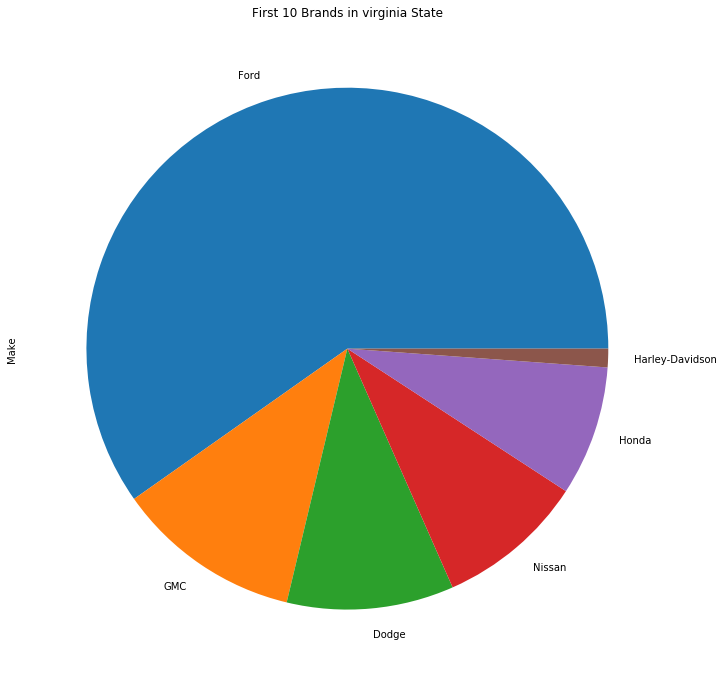

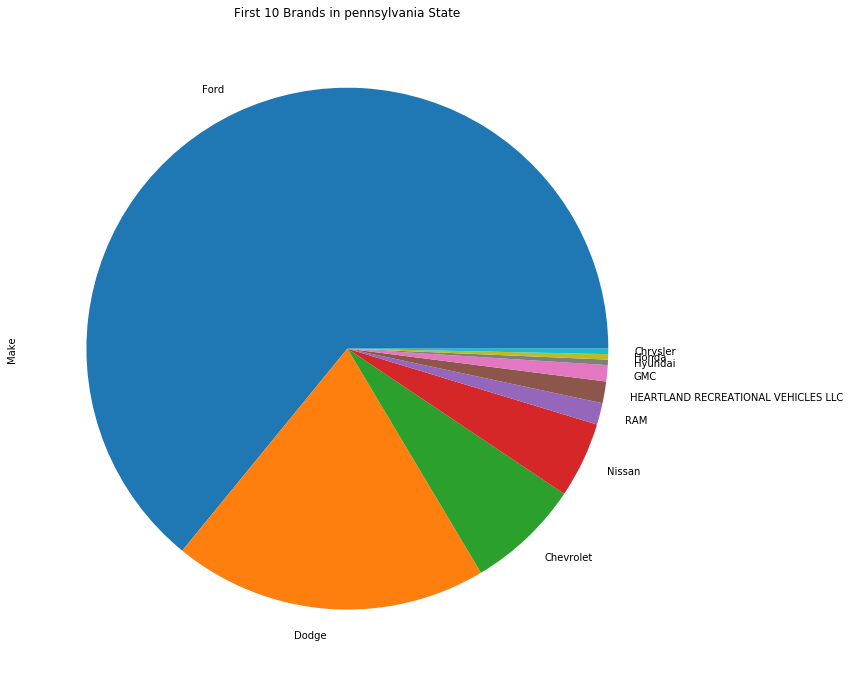

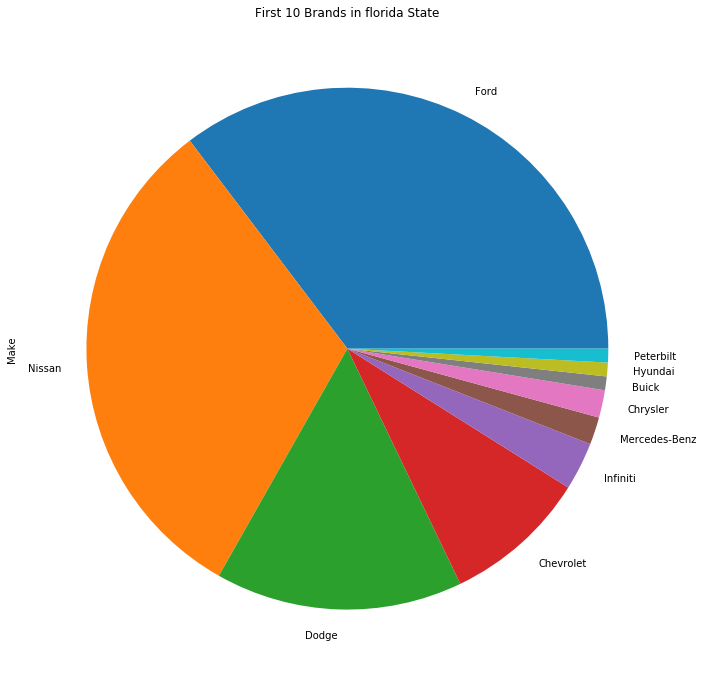

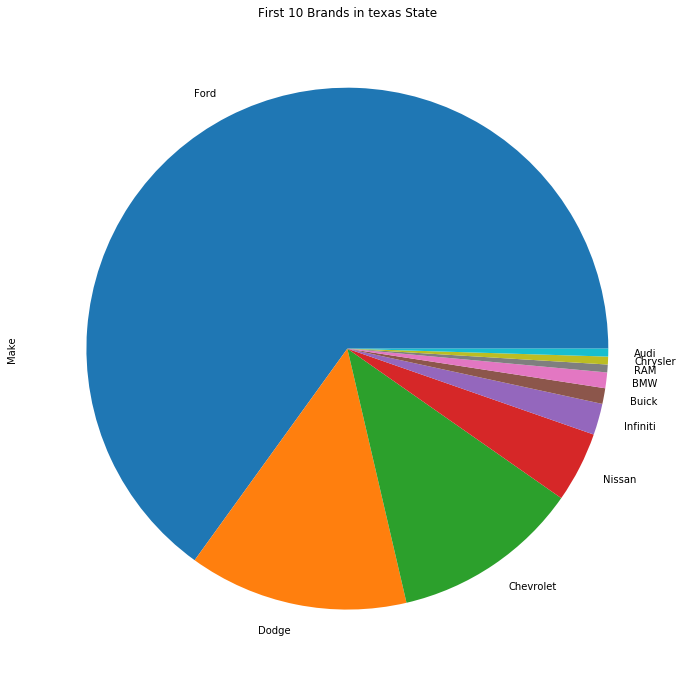

In [69]:
for i in state_list:
    plt.figure(figsize=(14,12))
    df_joint[df_joint['State']==i].groupby('Make')['Make'].agg('count').sort_values(ascending=False)[0:10].plot(kind='pie',title='First 10 Brands in '+i+' State')
    plt.show()
    

                            Total Cars Sold
Type                Color                  
light_truck_com_van white               388
suv                 black               208
                    white               176
Sedan               black               154
suv                 gray                152
                    silver              151
Sedan               gray                150
light_truck_com_van black               143
Sedan               white               128
light_truck_com_van gray                 83


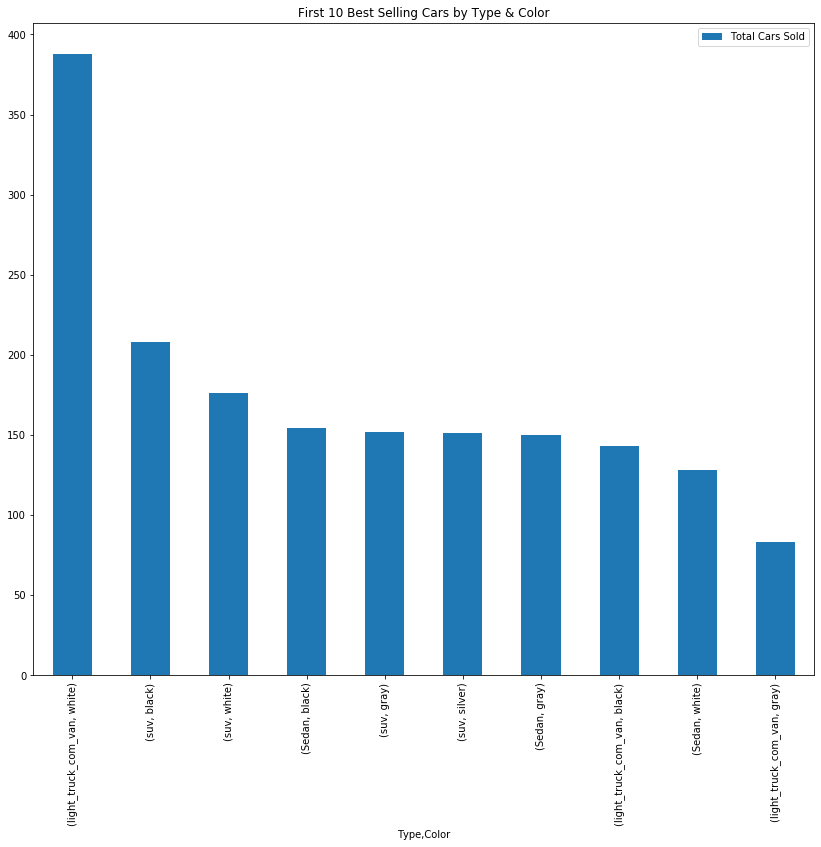

In [70]:
df_temp01 = df_joint[['Type','Color']]
df_temp01['Total Cars Sold'] = np.ones(len(df_temp00))
print(df_temp01.groupby(['Type','Color']).count().sort_values(by='Total Cars Sold',ascending=False)[0:10])

df_temp01.groupby(['Type','Color']).count().sort_values(by='Total Cars Sold',ascending=False)[0:10].plot(kind='bar',figsize=(14,12),
                                                                                                         title ='First 10 Best Selling Cars by Type & Color' )
plt.show()

                               Total Cars Sold
Type                Make                      
light_truck_com_van Ford                   576
suv                 Ford                   327
Sedan               Ford                   309
suv                 Dodge                  201
Sedan               Nissan                 153
suv                 Nissan                 146
Sedan               Dodge                  140
light_truck_com_van Chevrolet              121
suv                 Chevrolet               79
Sedan               Chevrolet               78


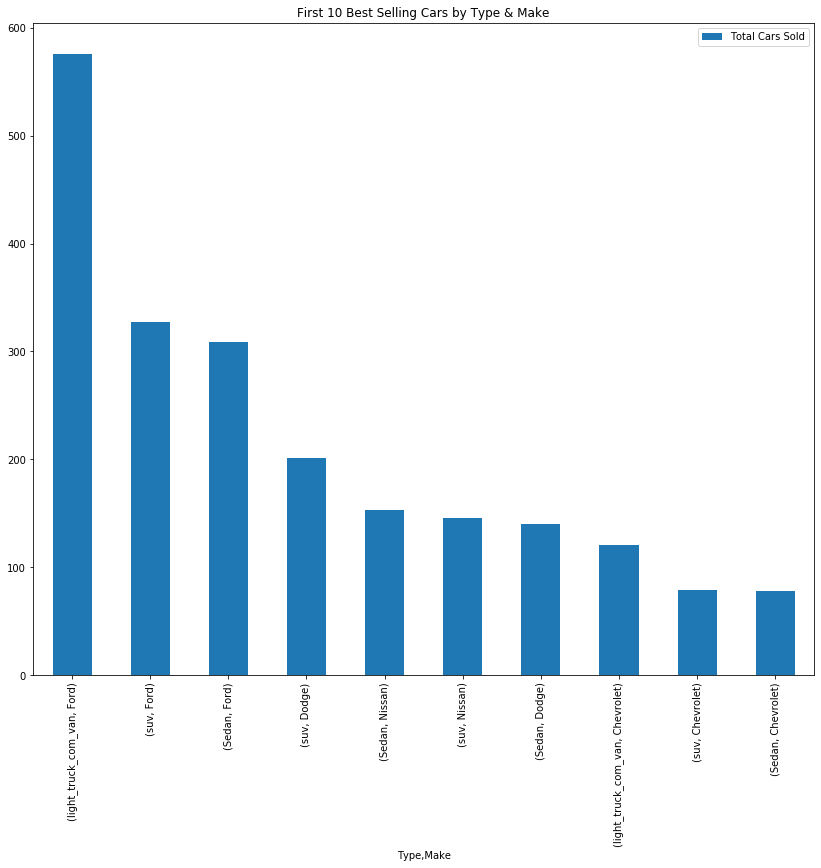

In [71]:
df_temp02 = df_joint[['Type','Make']]
df_temp02['Total Cars Sold'] = np.ones(len(df_temp00))
print(df_temp02.groupby(['Type','Make']).count().sort_values(by='Total Cars Sold',ascending=False)[0:10])

df_temp02.groupby(['Type','Make']).count().sort_values(by='Total Cars Sold',ascending=False)[0:10].plot(kind='bar',figsize=(14,12),
                                                                                                         title ='First 10 Best Selling Cars by Type & Make' )
plt.show()

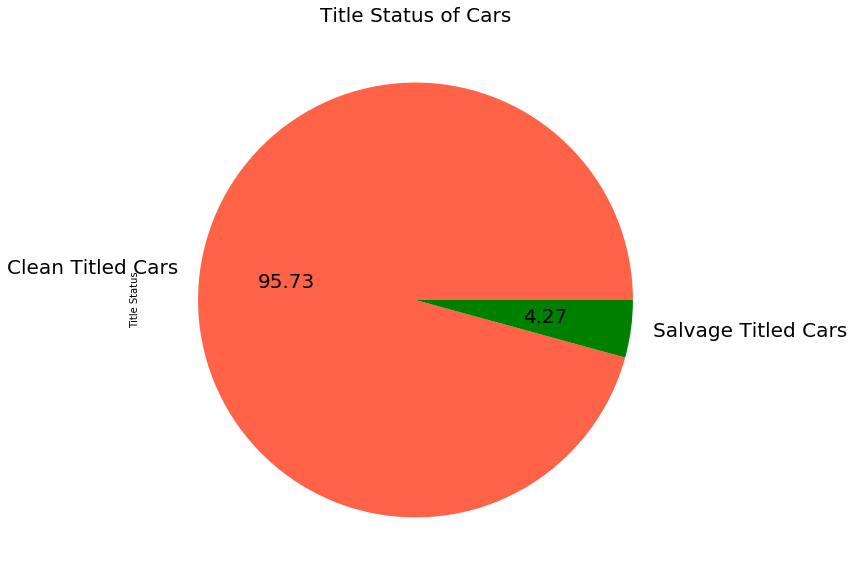

In [72]:
plt.figure(figsize=(12,10))
pd.Series(df_joint.groupby('Title Status')['Title Status'].agg('count')).plot.pie(labels=["Clean Titled Cars", "Salvage Titled Cars"],
colors=["tomato", "g"],autopct="%.2f",fontsize=20)
plt.title('Title Status of Cars',fontsize=20)
plt.show()

                                             Total Cars Sold
Type                Make      Title Status                  
light_truck_com_van Ford      clean vehicle              555
suv                 Ford      clean vehicle              317
Sedan               Ford      clean vehicle              289
suv                 Dodge     clean vehicle              195
                    Nissan    clean vehicle              142
Sedan               Nissan    clean vehicle              136
                    Dodge     clean vehicle              133
light_truck_com_van Chevrolet clean vehicle              119
suv                 Chevrolet clean vehicle               78
light_truck_com_van Dodge     clean vehicle               76


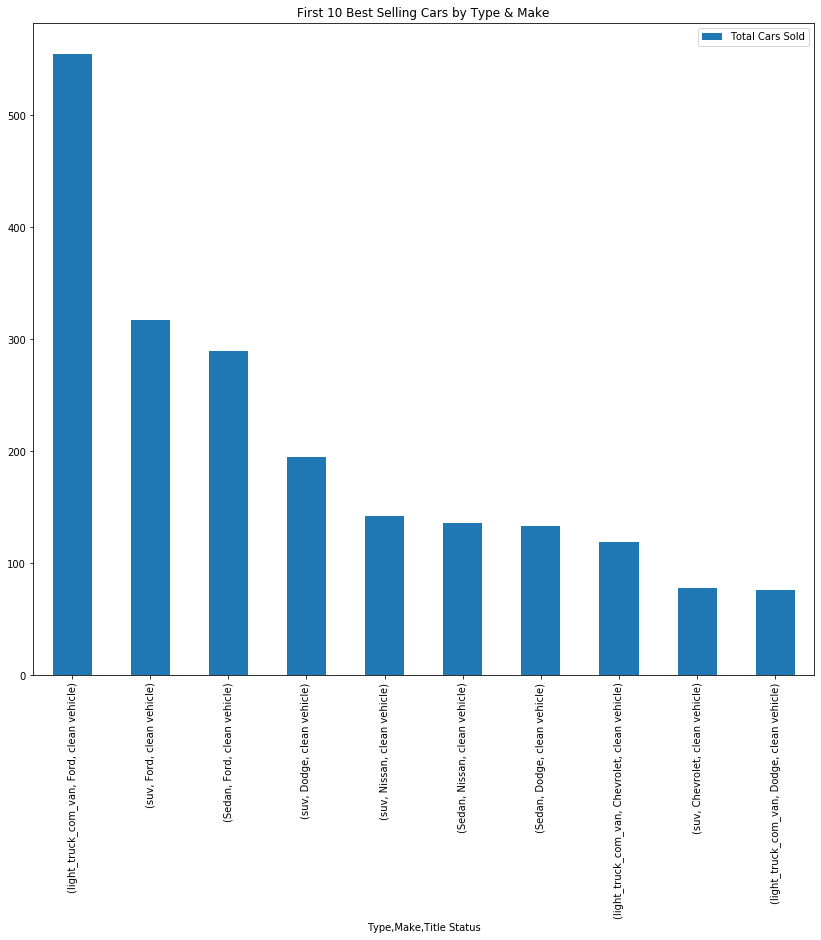

In [73]:
df_temp03 = df_joint[['Type','Make','Title Status']]
df_temp03['Total Cars Sold'] = np.ones(len(df_temp00))
print(df_temp03.groupby(['Type','Make','Title Status']).count().sort_values(by='Total Cars Sold',ascending=False)[0:10])

df_temp03.groupby(['Type','Make','Title Status']).count().sort_values(by='Total Cars Sold',ascending=False)[0:10].plot(kind='bar',figsize=(14,12),
                                                                                                         title ='First 10 Best Selling Cars by Type & Make' )
plt.show()

                                           Total Cars Sold
Type                Make   State                          
light_truck_com_van Ford   pennsylvania                110
                           texas                        76
                           michigan                     72
suv                 Nissan florida                      52
                    Dodge  north carolina               48
                    Ford   pennsylvania                 44
light_truck_com_van Ford   illinois                     37
Sedan               Ford   pennsylvania                 37
suv                 Ford   texas                        35
                           florida                      33


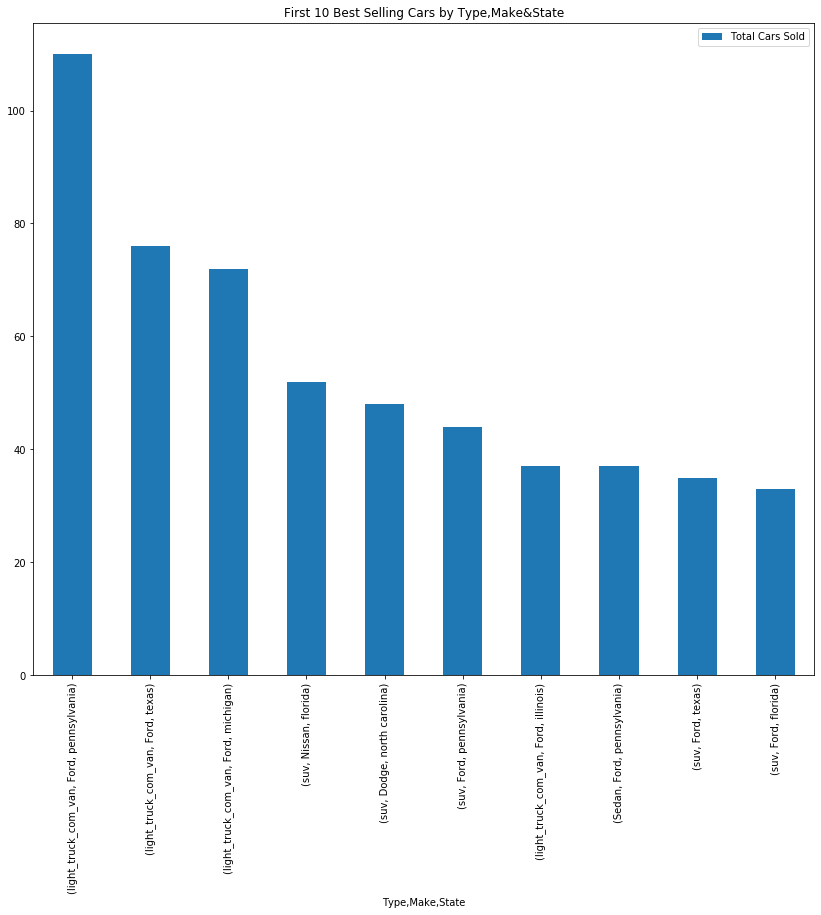

In [74]:
df_temp04 = df_joint[['Type','Make','State']]
df_temp04['Total Cars Sold'] = np.ones(len(df_temp00))
print(df_temp04.groupby(['Type','Make','State']).count().sort_values(by='Total Cars Sold',ascending=False)[0:10])

df_temp04.groupby(['Type','Make','State']).count().sort_values(by='Total Cars Sold',ascending=False)[0:10].plot(kind='bar',figsize=(14,12),
                                                                                                         title ='First 10 Best Selling Cars by Type,Make&State' )
plt.show()

                                                      Total Cars Sold
Type                Make   Model      State                          
light_truck_com_van Ford   F-150      pennsylvania                 71
                                      michigan                     57
suv                 Nissan Rogue      florida                      41
light_truck_com_van Ford   F-150      texas                        31
suv                 Dodge  Journey    north carolina               26
light_truck_com_van Ford   Transit    pennsylvania                 25
                           F-150      illinois                     24
suv                 Ford   Expedition pennsylvania                 24
Sedan               Ford   Mustang    new jersey                   24
                           Fusion     pennsylvania                 22


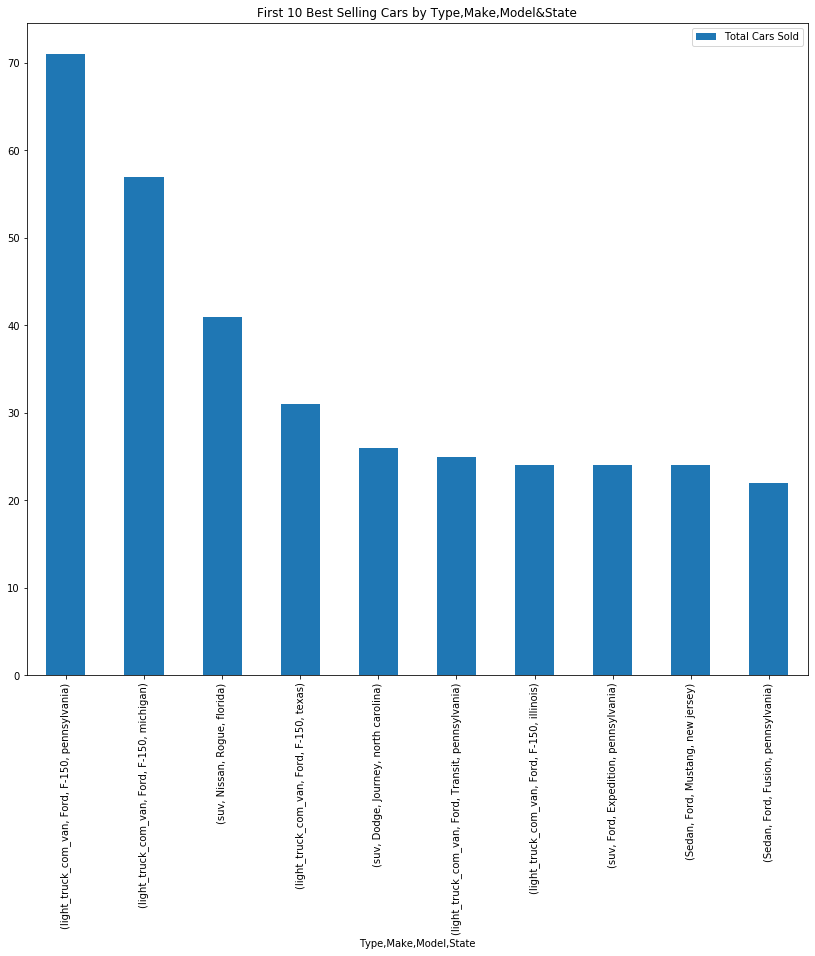

In [75]:
df_temp05 = df_joint[['Type','Make','Model','State']]
df_temp05['Total Cars Sold'] = np.ones(len(df_temp00))
print(df_temp05.groupby(['Type','Make','Model','State']).count().sort_values(by='Total Cars Sold',ascending=False)[0:10])

df_temp05.groupby(['Type','Make','Model','State']).count().sort_values(by='Total Cars Sold',ascending=False)[0:10].plot(kind='bar',figsize=(14,12),
                                                                                                         title ='First 10 Best Selling Cars by Type,Make,Model&State' )
plt.show()

                                              Liquidation Time
Type                Make            Model                     
Sedan               Acura           TL                0.083340
suv                 Kia             Sportage          0.083340
light_truck_com_van Nissan          NV200             0.291690
suv                 Nissan          Kicks             0.583380
                    GMC             Acadia            0.618105
                    Buick           Encore            0.666720
heawy_truck         Peterbilt       387               0.708390
                                    587               0.708390
suv                 Honda           CR-V              0.729225
motor_bike          Harley-Davidson FLHXS             0.750060


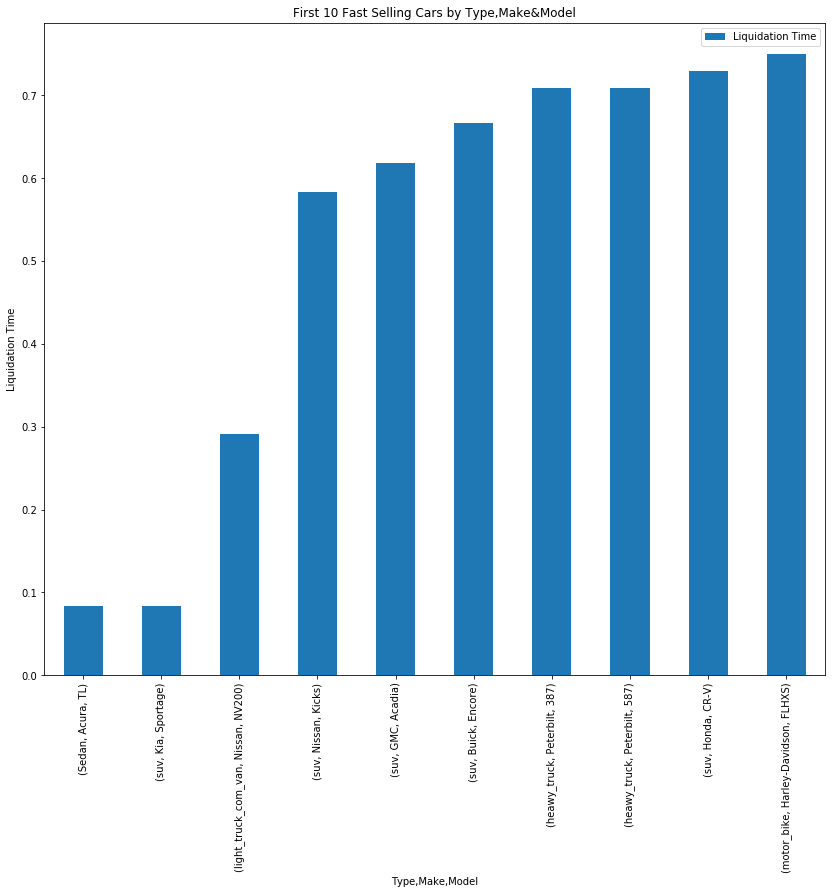

In [76]:
df_temp06 = df_joint[['Type','Make','Model','Liquidation Time']]

print(df_temp06.groupby(['Type','Make','Model']).mean().sort_values(by='Liquidation Time',ascending=True)[0:10])

ax = df_temp06.groupby(['Type','Make','Model']).mean().sort_values(by='Liquidation Time',ascending=True)[0:10].plot(kind='bar',figsize=(14,12),
                                                                                                         title ='First 10 Fast Selling Cars by Type,Make&Model' )

ax.set_ylabel('Liquidation Time')
plt.show()

                                                                          Total Cars Sold
Type                Make   Model         State          Liquidation Time                 
light_truck_com_van Ford   F-150         pennsylvania   3.00000                        57
suv                 Nissan Rogue         florida        7.00000                        23
                    Dodge  Journey       north carolina 2.00000                        23
                    Ford   Expedition    pennsylvania   3.00000                        22
                    Dodge  Grand Caravan north carolina 2.00000                        21
light_truck_com_van Ford   F-150         illinois       2.00000                        20
suv                 Nissan Rogue         minnesota      0.58338                        20
light_truck_com_van Ford   F-150         texas          2.00000                        18
suv                 GMC    Yukon         california     0.83340                        17
Sedan     

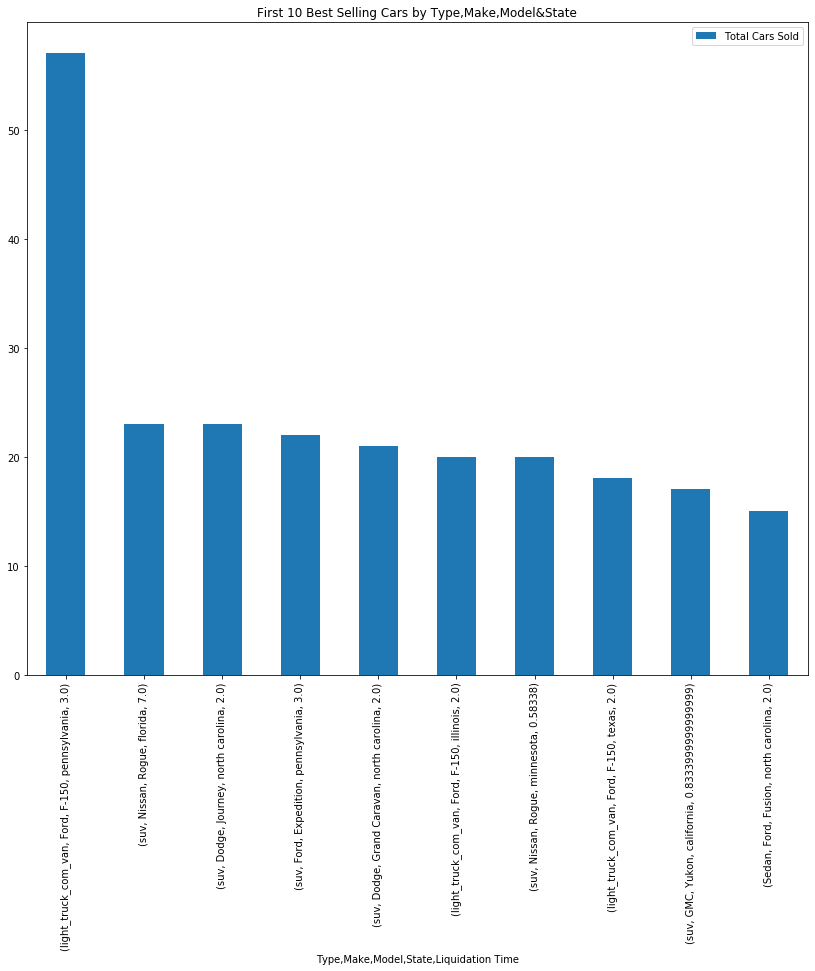

In [77]:
df_temp07 = df_joint[['Type','Make','Model','State','Liquidation Time']]
df_temp07['Total Cars Sold'] = np.ones(len(df_temp00))
print(df_temp07.groupby(['Type','Make','Model','State','Liquidation Time']).count().sort_values(by=['Total Cars Sold','Liquidation Time'],ascending=False)[0:10])

df_temp07.groupby(['Type','Make','Model','State','Liquidation Time']).count().sort_values(by=['Total Cars Sold','Liquidation Time'],ascending=False)[0:10].plot(kind='bar',figsize=(14,12),
                                                                                                         title ='First 10 Best Selling Cars by Type,Make,Model&State' )
plt.show()

                                                                          Total Cars Sold
Type                Make   Model         State          Liquidation Time                 
light_truck_com_van Ford   F-150         pennsylvania   3.000000                       57
suv                 Dodge  Journey       north carolina 2.000000                       23
                    Nissan Rogue         florida        7.000000                       23
                    Ford   Expedition    pennsylvania   3.000000                       22
                    Dodge  Grand Caravan north carolina 2.000000                       21
                    Nissan Rogue         minnesota      0.583380                       20
light_truck_com_van Ford   F-150         illinois       2.000000                       20
                                         texas          2.000000                       18
suv                 GMC    Yukon         california     0.833400                       17
light_truc

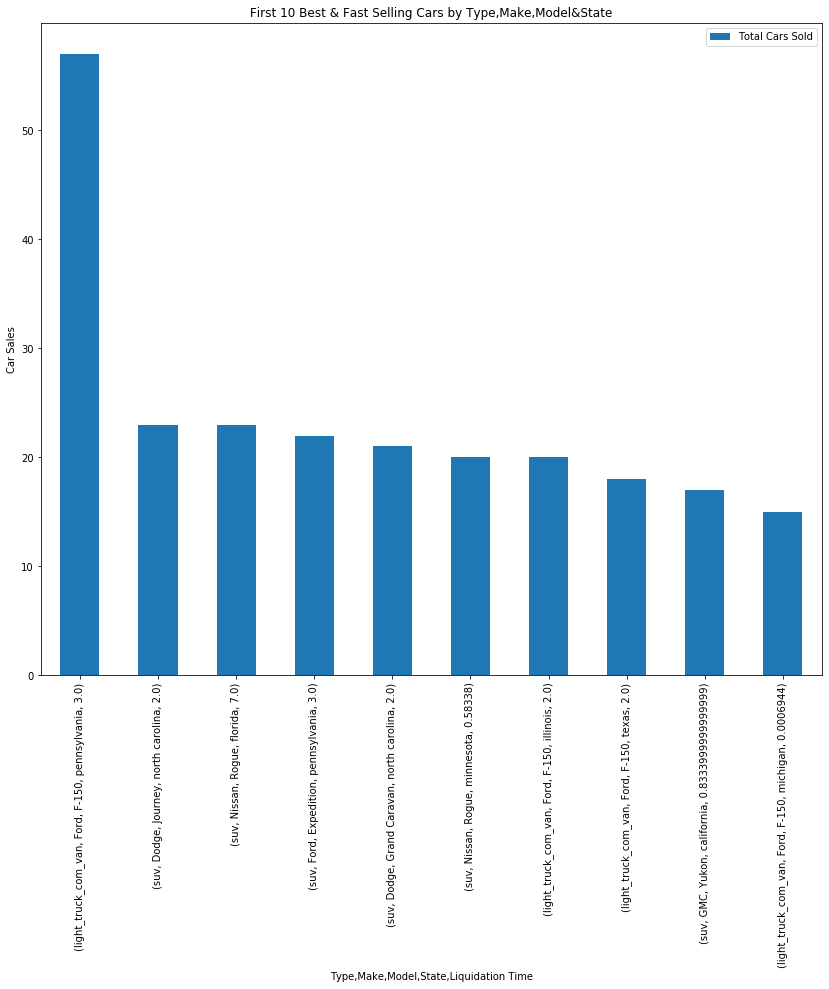

In [78]:
df_temp07 = df_joint[['Type','Make','Model','State','Liquidation Time']]
df_temp07['Total Cars Sold'] = np.ones(len(df_temp00))
print(df_temp07.groupby(['Type','Make','Model','State','Liquidation Time']).count().sort_values(by=['Total Cars Sold','Liquidation Time'],ascending=[False, True])[0:10])

ax=df_temp07.groupby(['Type','Make','Model','State','Liquidation Time']).count().sort_values(by=['Total Cars Sold','Liquidation Time'],ascending=[False, True])[0:10].plot(kind='bar',figsize=(14,12),
                                                                                                         title ='First 10 Best & Fast Selling Cars by Type,Make,Model&State' )
ax.set_ylabel('Car Sales')
plt.show()

                                                         Price   Age
Type                Make      Model      State                      
suv                 Lexus     GX 460     florida       55600.0   0.0
                    Ford      Explorer   virginia      46900.0   0.0
                                         missouri      32500.0   0.0
Sedan               Dodge     Challenger ohio          67000.0   1.0
                    BMW       7-Series   california    50500.0   1.0
...                                                        ...   ...
light_truck_com_van Dodge     Dakota     michigan       1400.0  18.0
suv                 Chevrolet Tracker    wisconsin      1200.0  19.0
                    Jeep      Cherokee   maryland        200.0  19.0
light_truck_com_van Dodge     1500       georgia        5000.0  20.0
Sedan               Chevrolet Camaro     pennsylvania  29800.0  47.0

[764 rows x 2 columns]


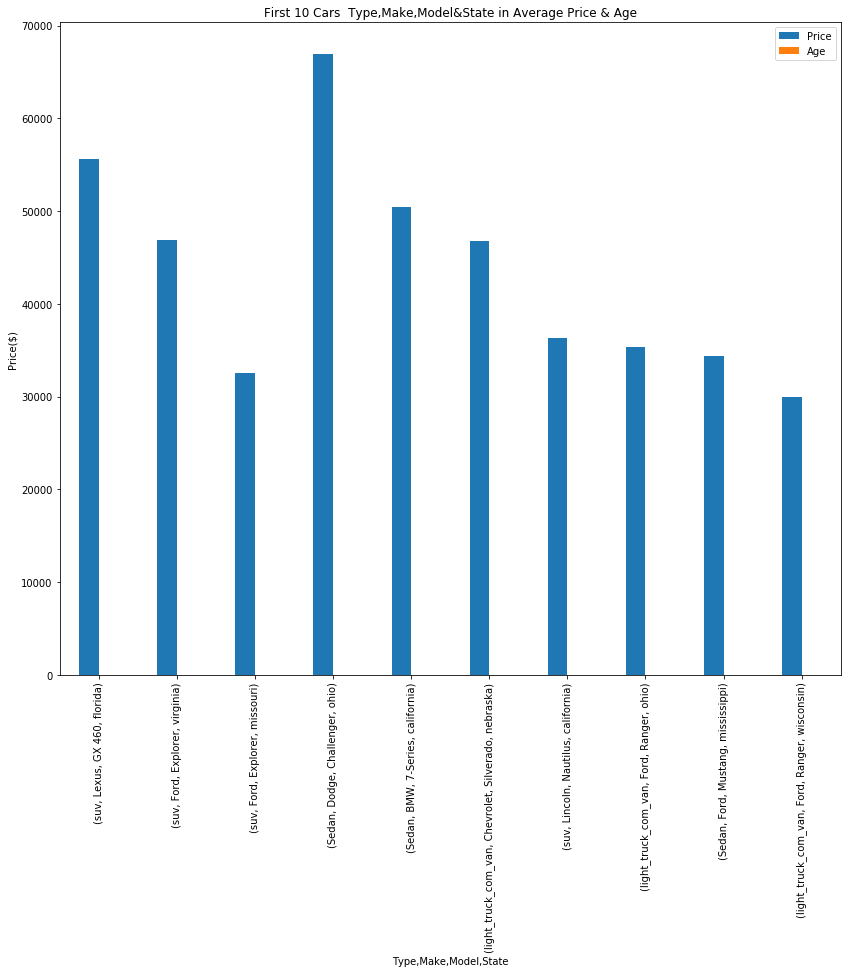

In [79]:
df_temp08 = df_joint[['Type','Make','Model','State','Price','Age']]

print(df_temp08.groupby(['Type','Make','Model','State']).mean().sort_values(by=['Age','Price'],ascending=[True, False]))

ax=df_temp08.groupby(['Type','Make','Model','State']).mean().sort_values(by=['Age','Price'],ascending=[True, False])[0:10].plot(kind='bar',figsize=(14,12),
                                                                    title ='First 10 Cars  Type,Make,Model&State in Average Price & Age' )
ax.set_ylabel('Price($)')
plt.show()

                 Price       Age
Origin                          
European  27658.529412  4.117647
Domestic  20457.556265  4.074693
Asian     11730.200542  4.308943


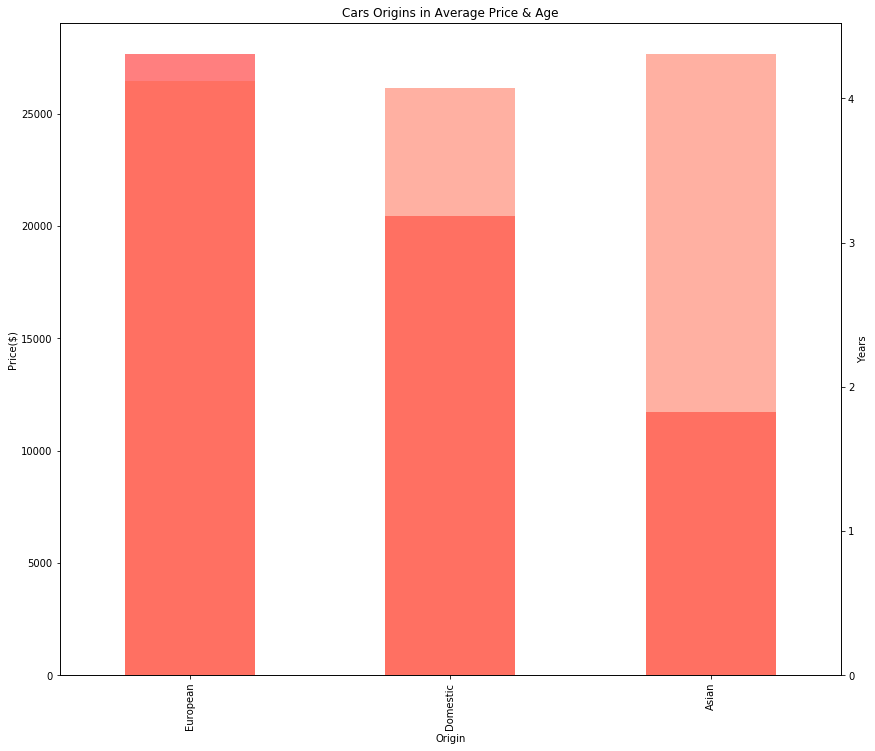

In [80]:
df_temp09 = df_joint[['Type','Make','Model','State','Price','Age','Origin']]
print(df_temp09.groupby(['Origin']).mean().sort_values(by=['Price','Age'],ascending=[False,True]))
ax0 = df_temp09.groupby(['Origin']).mean().sort_values(by=['Price','Age'],ascending=[False,True])['Price'].plot(kind='bar',figsize=(14,12),
                                                                    color='red',title ='Cars Origins in Average Price & Age',alpha=0.5 )

ax0.set_ylabel('Price($)')

ax1 = df_temp09.groupby(['Origin']).mean().sort_values(by=['Price','Age'],ascending=[False,True])['Age'].plot(kind='bar',figsize=(14,12),
                                                                  secondary_y=True, title ='Cars Origins in Average Price & Age',color='tomato',alpha=0.5 )
ax1.set_ylabel('Years')
plt.show()

In [81]:
df_joint[df_joint['Lot Number']==167781794]

,Make,Model,Year,Age,Price,Title Status,Mileage,Color,Vin Number,Lot Number,State,Country,Liquidation Time,Type,Origin
336,Chevrolet,Traverse,2018,2,26900,clean vehicle,42941.0,black,1gnevhkw8jj148388,167781794,missouri,USA,0.83340,suv,Domestic
661,Chevrolet,Traverse,2018,2,26900,clean vehicle,42941.0,black,1gnevhkw8jj148388,167781794,missouri,USA,0.79173,suv,Domestic


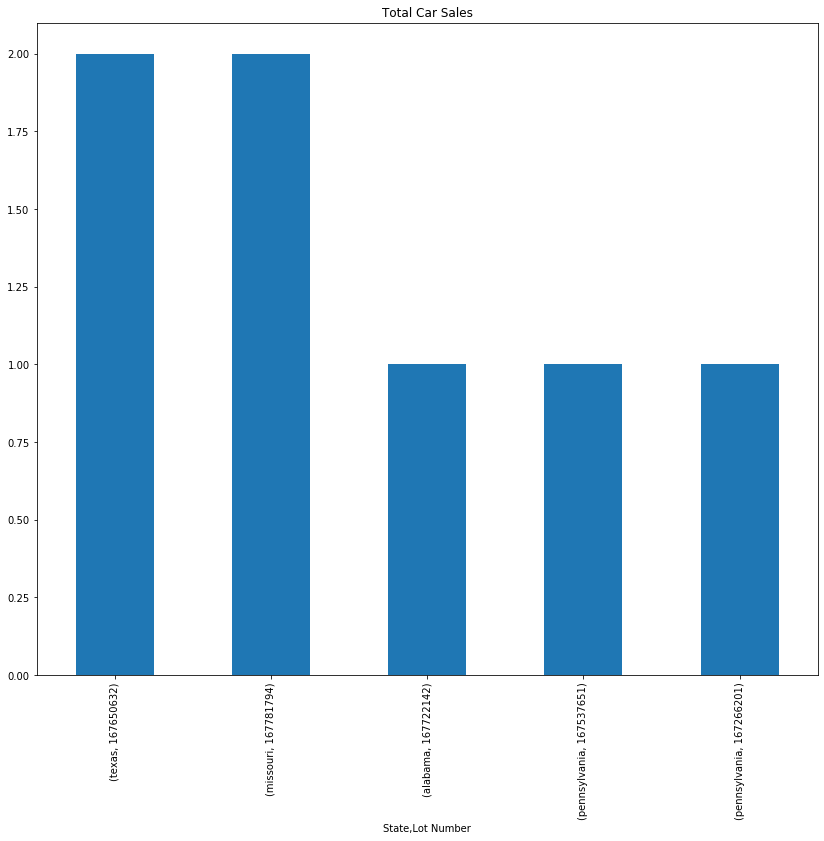

In [82]:
# Lot performance
df000 = df_joint[['State','Lot Number','Make']]

df000.groupby(['State','Lot Number']).count().sort_values(by='Make',ascending=False)['Make'][0:5].plot(kind='bar',title='Total Car Sales',figsize=(14,12))
plt.show()





In [83]:
# data info
df_joint.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2438 entries, 0 to 2498
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Make              2438 non-null   object 
 1   Model             2438 non-null   object 
 2   Year              2438 non-null   int64  
 3   Age               2438 non-null   int64  
 4   Price             2438 non-null   int64  
 5   Title Status      2438 non-null   object 
 6   Mileage           2438 non-null   float64
 7   Color             2438 non-null   object 
 8   Vin Number        2438 non-null   object 
 9   Lot Number        2438 non-null   int64  
 10  State             2438 non-null   object 
 11  Country           2438 non-null   object 
 12  Liquidation Time  2438 non-null   float64
 13  Type              2438 non-null   object 
 14  Origin            2438 non-null   object 
dtypes: float64(2), int64(4), object(9)
memory usage: 384.8+ KB


In [84]:
# Target
y = df_joint['Price']
y.reset_index(drop=True,inplace=True)

In [85]:
# Features
numerical_features = df_joint[['Age','Mileage','Liquidation Time']]
categorical_features = df_joint[['Title Status','Color','Type','Origin','State']]

In [86]:
numerical_features[numerical_features.isnull().any(axis=1)]


,Age,Mileage,Liquidation Time


In [87]:
categorical_features[categorical_features.isnull().any(axis=1)]

,Title Status,Color,Type,Origin,State


In [88]:
categorical_features = pd.get_dummies(categorical_features, drop_first=True)

In [89]:
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2438 entries, 0 to 2498
Data columns (total 95 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   Title Status_salvage insurance                 2438 non-null   uint8
 1   Color_billet silver metallic clearcoat         2438 non-null   uint8
 2   Color_black                                    2438 non-null   uint8
 3   Color_black clearcoat                          2438 non-null   uint8
 4   Color_blue                                     2438 non-null   uint8
 5   Color_bright white clearcoat                   2438 non-null   uint8
 6   Color_brown                                    2438 non-null   uint8
 7   Color_burgundy                                 2438 non-null   uint8
 8   Color_cayenne red                              2438 non-null   uint8
 9   Color_charcoal                                 2438 non-null   uint8
 10  

In [90]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(numerical_features)

# Scale the train set
numarical_features = scaler.transform(numerical_features)


In [91]:
numerical_features = pd.DataFrame(numarical_features)
numerical_features.columns = ['Age','Mileage','Liquidation Time']

In [92]:
print(len(categorical_features), len(numerical_features))

2438 2438


In [93]:
numerical_features.reset_index(drop=True,inplace=True)


In [94]:
categorical_features.reset_index(drop=True,inplace=True)
categorical_features

,Title Status_salvage insurance,Color_billet silver metallic clearcoat,Color_black,Color_black clearcoat,Color_blue,Color_bright white clearcoat,Color_brown,Color_burgundy,Color_cayenne red,Color_charcoal,...,State_rhode island,State_south carolina,State_tennessee,State_texas,State_utah,State_vermont,State_virginia,State_washington,State_west virginia,State_wisconsin
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2436,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
X = numerical_features.join(categorical_features)
X.reset_index(drop=True,inplace=True)

In [96]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split
# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [97]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor
from keras.regularizers import l2
from keras.layers import LSTM,Dense,Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import BatchNormalization
from sklearn.metrics import r2_score
from keras.regularizers import l2
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [98]:
input_dim = X_train.shape[1]

In [99]:
def make_keras_model2(learning_rate=0.01,activation='relu',layer1_units=64, layer2_units=64,
                      layer3_units=64,dropout_rate=0.1, nbr_features=input_dim ,l2_regularization=0):
     
        # Describing optimization function
        opt = Adam(lr =learning_rate)  
        # Initialize the model
        model_02 = Sequential()
        # Add input layer 
        model_02.add(Dense(layer1_units,input_shape=(nbr_features,),activation=activation))
        # Add Batchnormalization layer
        model_02.add(BatchNormalization())
        # Add first hidden layer
        model_02.add(Dense(layer2_units, activation = activation,kernel_regularizer=l2(l2_regularization)))
        # Add Batchnormalization layer
        model_02.add(BatchNormalization())
        # Add droupout layer
        model_02.add(Dropout(rate=dropout_rate))
        # Add Batchnormalization layer
        model_02.add(BatchNormalization())
        # Add second hidden layer
        model_02.add(Dense(layer3_units, activation = activation,kernel_regularizer=l2(l2_regularization)))
        # Add Batchnormalization layer
        model_02.add(BatchNormalization())
        # Add output layer
        model_02.add(Dense(1,activation='linear'))
    
        # Compile your model with your optimizer, loss, and metrics
        model_02.compile(optimizer = opt, loss = 'mse', metrics = ['mae'])
        return model_02

In [100]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor_keras = KerasRegressor(make_keras_model2, 
                                 batch_size=32, 
                                 layer1_units=64,
                                 layer2_units=64,
                                 layer3_units=64,
                                 dropout_rate=0,
                                 l2_regularization=0,
                                 epochs=10, 
                                 verbose=False)

In [101]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
pipeline_keras = Pipeline([('imputer', SimpleImputer()), 
                           ('scaler', StandardScaler()), 
                           ('model_02', regressor_keras)])

In [102]:
 param_grid_keras_02 ={
    
    
    'model_02__layer1_units': [32,64],
    'model_02__layer2_units': [16, 32],
    'model_02__layer3_units': [8, 16],
    'model_02__dropout_rate': [0, 0.2],
    'model_02__epochs': [10,20,30],
    'model_02__learning_rate':[0.01,0.1],
    'model_02__activation':['relu','tanh'],
    'model_02__batch_size':[32,64],
    
}

In [103]:

gridsearch_keras_02 = GridSearchCV(pipeline_keras,
                                param_grid=param_grid_keras_02,
                                scoring='neg_mean_squared_error',
                                cv=2, 
                                refit=True,
                                verbose=True)

In [104]:
gridsearch_keras_02.fit(X_train, y_train)

Fitting 2 folds for each of 384 candidates, totalling 768 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 768 out of 768 | elapsed: 80.1min finished


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('model_02',
                                        <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x0000000CA7018F88>)]),
             param_grid={'model_02__activation': ['relu', 'tanh'],
                         'model_02__batch_size': [32, 64],
                         'model_02__dropout_rate': [0, 0.2],
                         'model_02__epochs': [10, 20, 30],
                         'model_02__layer1_units': [32, 64],
                         'model_02__layer2_units': [16, 32],
                         'model_02__layer3_units': [8, 16],
                         'model_02__learning_rate': [0.01, 0.1]},
             scoring='neg_mean_squared_error', verbose=True)

In [105]:
y_test.reset_index(drop=True,inplace=True)

In [106]:
X_test.reset_index(drop=True,inplace=True)

In [107]:
y_pred_keras_02 = gridsearch_keras_02.predict(X_test)

In [108]:
print(f'Best params: {gridsearch_keras_02.best_params_}')

Best params: {'model_02__activation': 'relu', 'model_02__batch_size': 32, 'model_02__dropout_rate': 0.2, 'model_02__epochs': 30, 'model_02__layer1_units': 64, 'model_02__layer2_units': 32, 'model_02__layer3_units': 8, 'model_02__learning_rate': 0.1}


In [109]:
print(f'Best score: {gridsearch_keras_02.best_score_}')

Best score: -85060498.30701743


In [110]:
print(f'Test MSE: {mean_squared_error(y_true=y_test, y_pred=y_pred_keras_02)}')

Test MSE: 76923436.9031421


In [111]:
print(f'Test MAE: {mean_absolute_error(y_true=y_test, y_pred=y_pred_keras_02)}')

Test MAE: 5931.678352865373


In [112]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred_keras_02)
print('R2: ' '{:.4f}'.format(r2_score))

R2: 0.4705


In [113]:
gridsearch_keras_02.best_params_['model_02__batch_size']

32

In [114]:
# Describing optimization function
opt = Adam(lr = gridsearch_keras_02.best_params_['model_02__learning_rate'])  
# Initialize the model
model_02_tuned = Sequential()
# Add input layer 
model_02_tuned.add(Dense(gridsearch_keras_02.best_params_['model_02__layer1_units'],input_shape=(input_dim,),activation=gridsearch_keras_02.best_params_['model_02__activation']))
# Add Batchnormalization layer
model_02_tuned.add(BatchNormalization())
# Add first hidden layer
model_02_tuned.add(Dense(gridsearch_keras_02.best_params_['model_02__layer2_units'],activation = gridsearch_keras_02.best_params_['model_02__activation'],kernel_regularizer=l2(0)))
# Add Batchnormalization layer
model_02_tuned.add(BatchNormalization())
# Add droupout layer
model_02_tuned.add(Dropout(rate=gridsearch_keras_02.best_params_['model_02__dropout_rate']))
# Add Batchnormalization layer
model_02_tuned.add(BatchNormalization())
# Add second hidden layer
model_02_tuned.add(Dense(gridsearch_keras_02.best_params_['model_02__layer3_units'], activation = gridsearch_keras_02.best_params_['model_02__activation'],kernel_regularizer=l2(0)))
# Add Batchnormalization layer
model_02_tuned.add(BatchNormalization())
# Add output layer
model_02_tuned.add(Dense(1,activation='linear'))
    
# Compile your model with your optimizer, loss, and metrics
model_02_tuned.compile(optimizer = opt, loss = 'mse', metrics =['mean_absolute_error'])

In [115]:
model_02_tuned_hist = model_02_tuned.fit(X_train, y_train,epochs = gridsearch_keras_02.best_params_['model_02__epochs']
                                                 ,batch_size=gridsearch_keras_02.best_params_['model_02__batch_size'],
               validation_data=(X_test, y_test))

Epoch 1/30
52/52 [==============================] - 1s 25ms/step - loss: 512404448.0000 - mean_absolute_error: 19354.5566 - val_loss: 452326144.0000 - val_mean_absolute_error: 18213.3008
Epoch 2/30
52/52 [==============================] - 1s 11ms/step - loss: 472490720.0000 - mean_absolute_error: 18595.4609 - val_loss: 424798336.0000 - val_mean_absolute_error: 18403.7637
Epoch 3/30
52/52 [==============================] - 1s 12ms/step - loss: 387519296.0000 - mean_absolute_error: 16810.1387 - val_loss: 369923008.0000 - val_mean_absolute_error: 16644.6973
Epoch 4/30
52/52 [==============================] - 1s 10ms/step - loss: 285068000.0000 - mean_absolute_error: 14307.6514 - val_loss: 485432320.0000 - val_mean_absolute_error: 17823.0801
Epoch 5/30
52/52 [==============================] - 1s 11ms/step - loss: 192282464.0000 - mean_absolute_error: 11442.1162 - val_loss: 440581728.0000 - val_mean_absolute_error: 17550.3750
Epoch 6/30
52/52 [==============================] - 1s 10ms/step 

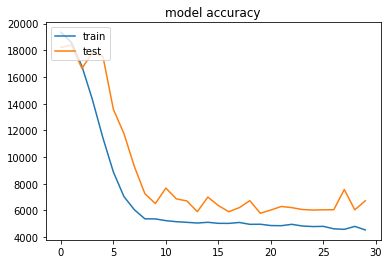

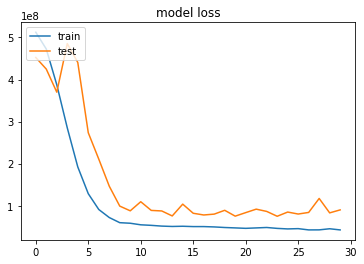

In [116]:
# summarize history for accuracy
plt.plot(model_02_tuned_hist.history['mean_absolute_error'])
plt.plot(model_02_tuned_hist.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_02_tuned_hist.history['loss'])
plt.plot(model_02_tuned_hist.history['val_loss'])
plt.title('model loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [117]:

pred_train = model_02_tuned.predict(X_train)
pred_train = pd.DataFrame(pred_train,columns=['Fitted Price'])

In [118]:
# actual prices for train
ytrain = pd.DataFrame(y_train,columns=['Actual Price'])
ytrain = pd.DataFrame(ytrain,columns=['Actual Price'])

In [126]:
y_train.reset_index(drop=True,inplace=True)

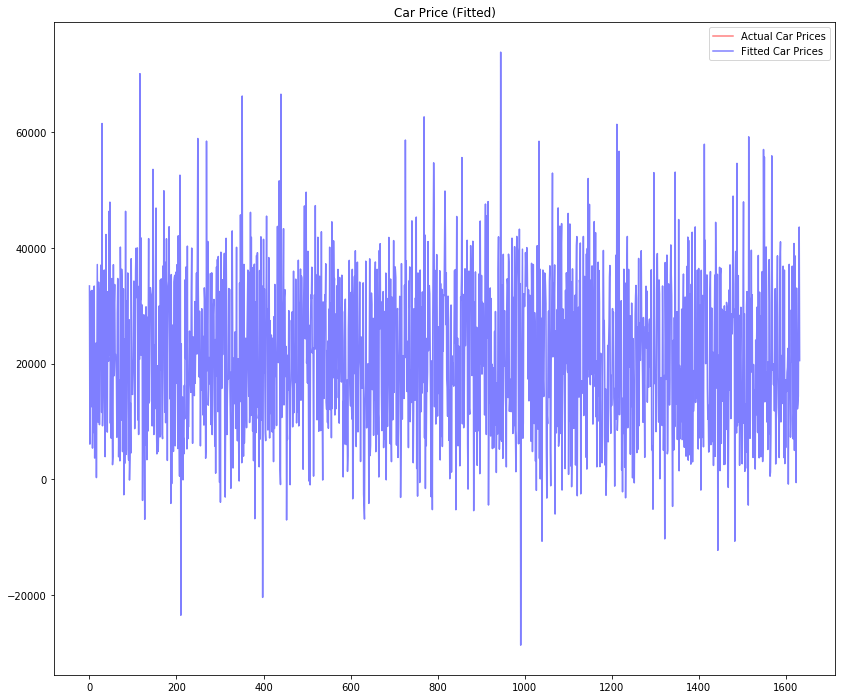

In [127]:
# Visualising the results
plt.figure(figsize=(14,12))
plt.plot(ytrain, color = 'red', label = 'Actual Car Prices',alpha=0.5)
plt.plot(pred_train, color = 'blue', label = 'Fitted Car Prices',alpha=0.5)
plt.title('Car Price (Fitted)')
plt.legend()
plt.show()

In [120]:

pred_test = model_02_tuned.predict(X_test)
pred_test = pd.DataFrame(pred_test,columns=['Forecast Price'])

In [121]:
# actual prices for train
ytest = pd.DataFrame(y_test,columns=['Actual Price'])
ytest = pd.DataFrame(ytest,columns=['Actual Price'])

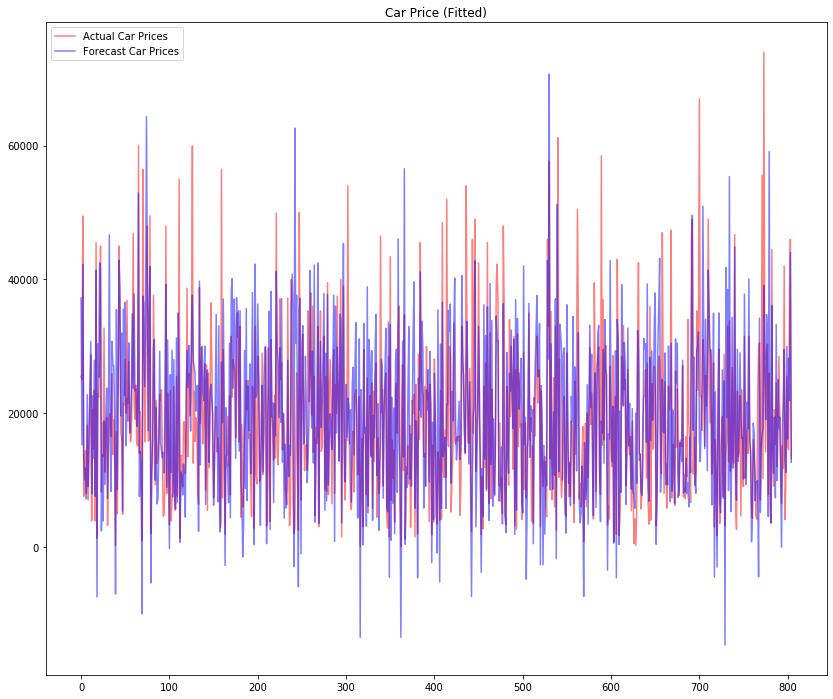

In [122]:
# Visualising the results
plt.figure(figsize=(14,12))
plt.plot(y_test, color = 'red', label = 'Actual Car Prices',alpha=0.5)
plt.plot(pred_test, color = 'blue', label = 'Forecast Car Prices',alpha=0.5)
plt.title('Car Price (Fitted)')
plt.legend()
plt.show()